# Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator 
to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn
rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers
at high risk of churn and identify the main indicators of churn.

## Understanding and Defining Churn
There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

This project is based on the Indian and Southeast Asian market.

## Definitions of Churn
There are various ways to define churn, such as:

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.
The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.
In this project, you will use the usage-based definition to define churn.

High-value Churn
In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

 

## Understanding the Business Objective and the Data
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

### Understanding Customer Behaviour During Churn
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

**The ‘good’ phase**
<br>In this phase, the customer is happy with the service and behaves as usual. The first two months are the 'good' phase.

**The ‘action’ phase**
<br>The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.). The third month is the 'action' phase.

**The ‘churn’ phase**
<br>In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase. The fourth month is the 'churn' phase. 

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Reading the datset and displaying the various info related to the dataset

In [2]:
# Reading the dataset and dispalying the first 5 rows
telecom = pd.read_csv('telecom_churn_data.csv')

telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [3]:
# No. of rows and columns in the dataset
print("Shape of the dataset: " ,telecom.shape)
print("\n")
# Data types of the columns
print(telecom.info(verbose=True,null_counts=True))

Shape of the dataset:  (99999, 226)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null f

In [4]:
# Describe the dataset
telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [5]:
# Find the number of unique values in each column

for i in range(len(telecom.columns)):
    print(telecom.columns[i],":", len(telecom[telecom.columns[i]].unique().tolist()) )

# Drop the columns mobile_number, circle_id as mobile_number is just an identifier for the record and circle_id 
# has only one value. 
telecom.drop(['mobile_number','circle_id'],axis=1,inplace=True)




mobile_number : 99999
circle_id : 1
loc_og_t2o_mou : 2
std_og_t2o_mou : 2
loc_ic_t2o_mou : 2
last_date_of_month_6 : 1
last_date_of_month_7 : 2
last_date_of_month_8 : 2
last_date_of_month_9 : 2
arpu_6 : 85681
arpu_7 : 85308
arpu_8 : 83615
arpu_9 : 79937
onnet_mou_6 : 24314
onnet_mou_7 : 24337
onnet_mou_8 : 24090
onnet_mou_9 : 23566
offnet_mou_6 : 31141
offnet_mou_7 : 31024
offnet_mou_8 : 30909
offnet_mou_9 : 30078
roam_ic_mou_6 : 6513
roam_ic_mou_7 : 5231
roam_ic_mou_8 : 5316
roam_ic_mou_9 : 4828
roam_og_mou_6 : 8039
roam_og_mou_7 : 6640
roam_og_mou_8 : 6505
roam_og_mou_9 : 5883
loc_og_t2t_mou_6 : 13540
loc_og_t2t_mou_7 : 13412
loc_og_t2t_mou_8 : 13337
loc_og_t2t_mou_9 : 12950
loc_og_t2m_mou_6 : 20906
loc_og_t2m_mou_7 : 20638
loc_og_t2m_mou_8 : 20545
loc_og_t2m_mou_9 : 20142
loc_og_t2f_mou_6 : 3861
loc_og_t2f_mou_7 : 3864
loc_og_t2f_mou_8 : 3808
loc_og_t2f_mou_9 : 3759
loc_og_t2c_mou_6 : 2236
loc_og_t2c_mou_7 : 2427
loc_og_t2c_mou_8 : 2517
loc_og_t2c_mou_9 : 2333
loc_og_mou_6 : 26373
lo

# Handling Missing Values

In [6]:
print((telecom['last_date_of_month_7'].unique().tolist()))
print((telecom['last_date_of_month_8'].unique().tolist()))
print((telecom['last_date_of_month_9'].unique().tolist()))

# Replace null values in the columns last_date_of_month_7, last_date_of_month_8, last_date_of_month_9 with the last date
# values for the respective month.

last_date = ['last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']
for i in last_date:
    if (i == 'last_date_of_month_7'):
        telecom.loc[telecom[i].isnull(),i] = '7/31/2014'
    elif (i == 'last_date_of_month_8'):
        telecom.loc[telecom[i].isnull(),i] = '8/31/2014'
    else:
        telecom.loc[telecom[i].isnull(),i] = '9/30/2014'

print('\n')
print((telecom['last_date_of_month_7'].unique().tolist()))
print((telecom['last_date_of_month_8'].unique().tolist()))
print((telecom['last_date_of_month_9'].unique().tolist()))


['7/31/2014', nan]
['8/31/2014', nan]
['9/30/2014', nan]


['7/31/2014']
['8/31/2014']
['9/30/2014']


In [7]:
#Changing the data type of date columns
telecom['last_date_of_month_6'] = pd.to_datetime(telecom['last_date_of_month_6'])
telecom['last_date_of_month_7'] = pd.to_datetime(telecom['last_date_of_month_7'])
telecom['last_date_of_month_8'] = pd.to_datetime(telecom['last_date_of_month_8'])
telecom['last_date_of_month_9'] = pd.to_datetime(telecom['last_date_of_month_9'])
telecom['date_of_last_rech_6'] = pd.to_datetime(telecom['date_of_last_rech_6'])
telecom['date_of_last_rech_7'] = pd.to_datetime(telecom['date_of_last_rech_7'])
telecom['date_of_last_rech_8'] = pd.to_datetime(telecom['date_of_last_rech_8'])
telecom['date_of_last_rech_9'] = pd.to_datetime(telecom['date_of_last_rech_9'])
telecom['date_of_last_rech_data_6'] = pd.to_datetime(telecom['date_of_last_rech_data_6'])
telecom['date_of_last_rech_data_7'] = pd.to_datetime(telecom['date_of_last_rech_data_7'])
telecom['date_of_last_rech_data_8'] = pd.to_datetime(telecom['date_of_last_rech_data_8'])
telecom['date_of_last_rech_data_9'] = pd.to_datetime(telecom['date_of_last_rech_data_9'])

In [8]:
# Print cols with count of unique values less than or equal to 2
col_lst = []

for i in range(len(telecom.columns)):
    if (len(telecom[telecom.columns[i]].unique().tolist())) <= 2:
        print(telecom.columns[i],":", len(telecom[telecom.columns[i]].unique().tolist()) )
        col_lst.append(telecom.columns[i])


loc_og_t2o_mou : 2
std_og_t2o_mou : 2
loc_ic_t2o_mou : 2
last_date_of_month_6 : 1
last_date_of_month_7 : 1
last_date_of_month_8 : 1
last_date_of_month_9 : 1
std_og_t2c_mou_6 : 2
std_og_t2c_mou_7 : 2
std_og_t2c_mou_8 : 2
std_og_t2c_mou_9 : 2
std_ic_t2o_mou_6 : 2
std_ic_t2o_mou_7 : 2
std_ic_t2o_mou_8 : 2
std_ic_t2o_mou_9 : 2


In [9]:
# Print the unique values

for i in range(len(col_lst)):
    print(col_lst[i], ":",(telecom[col_lst[i]].unique().tolist()))
    
    

# Find the percentage of missing values in these columns.
df = ((100*telecom[col_lst].isnull().sum()/len(telecom[col_lst].index)).sort_values(ascending = False).to_frame())

# # Display only those columns having nulls
df[df.iloc[:,0]> 0.00]





loc_og_t2o_mou : [0.0, nan]
std_og_t2o_mou : [0.0, nan]
loc_ic_t2o_mou : [0.0, nan]
last_date_of_month_6 : [1404086400000000000]
last_date_of_month_7 : [1406764800000000000]
last_date_of_month_8 : [1409443200000000000]
last_date_of_month_9 : [1412035200000000000]
std_og_t2c_mou_6 : [nan, 0.0]
std_og_t2c_mou_7 : [nan, 0.0]
std_og_t2c_mou_8 : [0.0, nan]
std_og_t2c_mou_9 : [nan, 0.0]
std_ic_t2o_mou_6 : [nan, 0.0]
std_ic_t2o_mou_7 : [nan, 0.0]
std_ic_t2o_mou_8 : [0.0, nan]
std_ic_t2o_mou_9 : [nan, 0.0]


0
std_ic_t2o_mou_9  7.745077
std_og_t2c_mou_9  7.745077
std_ic_t2o_mou_8  5.378054
std_og_t2c_mou_8  5.378054
std_ic_t2o_mou_6  3.937039
std_og_t2c_mou_6  3.937039
std_ic_t2o_mou_7  3.859039
std_og_t2c_mou_7  3.859039
loc_ic_t2o_mou    1.018010
std_og_t2o_mou    1.018010
loc_og_t2o_mou    1.018010

In [10]:
# Dropping the columns

# The columns last_date_of_month_6, last_date_of_month_7, last_date_of_month_8, last_date_of_month_9 has got one unique value.
# Hence, these columns could be dropped.


# Drop the columns loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou , std_ic_t2o_mou_(6-9), std_og_t2c_mou_(6-9) as the 
# column has only two values 0.0 and null.
# The percentage of null values is 1.01%. Even if we remove the null rows, we are left with only one unique value i.e. 0
# Business significance of these columns relate to the minutes of usage - voice calls. A value of 0 indicate that the number
# has not been used for making outgoing local and std calls for operator to fixed line of other operator, incoming calls
# received from fixed line of other operator.
# Hence, dropping these columns
telecom.drop(col_lst,axis=1,inplace=True)


In [11]:
# Find the percentage of missing values.
df = ((100*telecom.isnull().sum()/len(telecom.index)).sort_values(ascending = False).to_frame())

# Display only those columns having nulls
df[df.iloc[:,0]> 0.00]

0
total_rech_data_6         74.846748
count_rech_2g_6           74.846748
arpu_2g_6                 74.846748
arpu_3g_6                 74.846748
av_rech_amt_data_6        74.846748
count_rech_3g_6           74.846748
fb_user_6                 74.846748
night_pck_user_6          74.846748
max_rech_data_6           74.846748
date_of_last_rech_data_6  74.846748
max_rech_data_7           74.428744
night_pck_user_7          74.428744
total_rech_data_7         74.428744
av_rech_amt_data_7        74.428744
date_of_last_rech_data_7  74.428744
arpu_3g_7                 74.428744
arpu_2g_7                 74.428744
count_rech_2g_7           74.428744
count_rech_3g_7           74.428744
fb_user_7                 74.428744
fb_user_9                 74.077741
arpu_2g_9                 74.077741
count_rech_3g_9           74.077741
count_rech_2g_9           74.077741
av_rech_amt_data_9        74.077741
max_rech_data_9           74.077741
total_rech_data_9         74.077741
arpu_3g_9                 74.077741
date_of_last_rech_data_9  74.077741
night_pck_user_9          74.077741
fb_user_8                 73.660737
total_rech_data_8         73.660737
count_rech_2g_8           73.660737
av_rech_amt_data_8        73.660737
max_rech_data_8           73.660737
arpu_2g_8                 73.660737
night_pck_user_8          73.660737
count_rech_3g_8           73.660737
arpu_3g_8                 73.660737
date_of_last_rech_data_8  73.660737
loc_ic_t2m_mou_9           7.745077
roam_ic_mou_9              7.745077
loc_ic_t2f_mou_9           7.745077
spl_og_mou_9               7.745077
og_others_9                7.745077
std_og_t2f_mou_9           7.745077
loc_og_t2f_mou_9           7.745077
std_og_mou_9               7.745077
loc_ic_t2t_mou_9           7.745077
loc_og_t2c_mou_9           7.745077
loc_og_mou_9               7.745077
std_og_t2t_mou_9           7.745077
std_og_t2m_mou_9           7.745077
isd_og_mou_9               7.745077
offnet_mou_9               7.745077
spl_ic_mou_9               7.745077
std_ic_mou_9               7.745077
std_ic_t2m_mou_9           7.745077
isd_ic_mou_9               7.745077
std_ic_t2f_mou_9           7.745077
roam_og_mou_9              7.745077
loc_og_t2t_mou_9           7.745077
std_ic_t2t_mou_9           7.745077
loc_ic_mou_9               7.745077
ic_others_9                7.745077
loc_og_t2m_mou_9           7.745077
onnet_mou_9                7.745077
loc_ic_t2t_mou_8           5.378054
std_og_t2t_mou_8           5.378054
isd_ic_mou_8               5.378054
loc_og_mou_8               5.378054
spl_ic_mou_8               5.378054
std_ic_mou_8               5.378054
std_ic_t2f_mou_8           5.378054
std_og_t2f_mou_8           5.378054
ic_others_8                5.378054
loc_og_t2c_mou_8           5.378054
roam_ic_mou_8              5.378054
spl_og_mou_8               5.378054
onnet_mou_8                5.378054
roam_og_mou_8              5.378054
loc_ic_mou_8               5.378054
offnet_mou_8               5.378054
isd_og_mou_8               5.378054
std_ic_t2t_mou_8           5.378054
loc_og_t2t_mou_8           5.378054
og_others_8                5.378054
loc_og_t2m_mou_8           5.378054
std_og_t2m_mou_8           5.378054
loc_ic_t2f_mou_8           5.378054
loc_ic_t2m_mou_8           5.378054
std_og_mou_8               5.378054
loc_og_t2f_mou_8           5.378054
std_ic_t2m_mou_8           5.378054
date_of_last_rech_9        4.760048
loc_ic_t2t_mou_6           3.937039
loc_ic_t2m_mou_6           3.937039
loc_ic_mou_6               3.937039
std_ic_mou_6               3.937039
std_ic_t2m_mou_6           3.937039
std_ic_t2t_mou_6           3.937039
std_ic_t2f_mou_6           3.937039
loc_ic_t2f_mou_6           3.937039
std_og_t2m_mou_6           3.937039
og_others_6                3.937039
isd_og_mou_6               3.937039
onnet_mou_6                3.937039
offnet_mou_6               3.937039
roam_ic_mou_6              3.937039
roam_og_mou_6              3.937039
spl_og_mou_6               3.937039
lo

In [12]:
# It is seen that percentage of null values in the columns date_of_last_rech_data_6, arpu_2g_6, av_rech_amt_data_6,
# arpu_3g_6, night_pck_user_6, fb_user_6, count_rech_3g_6, max_rech_data_6, total_rech_data_6, count_rech_2g_6 is the same
# i.e  74.85%
# It indicates that no data recharge was done for these numbers. Hence, we can prefill the null values to zero.

# Similarly if the date of last data recharge is not available, the data corresponding to other columns is also not 
# available and the percentage of nulls is the same, we can conclude that no data recharge was done for that month and 
# hence any other data related to data related usage is zero.

# Impute the null values to zeroes for the columns arpu_3g_7, arpu_2g_7, night_pck_user_7, 
# total_rech_data_7, max_rech_data_7, date_of_last_rech_data_7, count_rech_3g_7, count_rech_2g_7, av_rech_amt_data_7, 
# fb_user_7 (percentage of null values = 74.43%)

# Impute null values to zero for night_pck_user_9, max_rech_data_9, count_rech_3g_9, fb_user_9, arpu_2g_9, arpu_3g_9, 
# total_rech_data_9, av_rech_amt_data_9, count_rech_2g_9, date_of_last_rech_data_9 (percentage of null values = 74.08%)

# Impute null values to zero for av_rech_amt_data_8, count_rech_2g_8, count_rech_3g_8, max_rech_data_8, night_pck_user_8, 
# arpu_3g_8, total_rech_data_8, date_of_last_rech_data_8, fb_user_8, arpu_2g_8 (percentage of null values = 73.66%)


# print((telecom['arpu_2g_6'].unique().tolist()))

col_lst_6 = ['arpu_2g_6', 'av_rech_amt_data_6','arpu_3g_6', 'night_pck_user_6', 'fb_user_6', 'count_rech_3g_6', 
             'max_rech_data_6', 'total_rech_data_6', 'count_rech_2g_6']

col_lst_7 = ['arpu_2g_7', 'av_rech_amt_data_7','arpu_3g_7', 'night_pck_user_7', 'fb_user_7', 'count_rech_3g_7', 
             'max_rech_data_7', 'total_rech_data_7', 'count_rech_2g_7']

col_lst_8 = ['arpu_2g_8', 'av_rech_amt_data_8','arpu_3g_8', 'night_pck_user_8', 'fb_user_8', 'count_rech_3g_8', 
             'max_rech_data_8', 'total_rech_data_8', 'count_rech_2g_8']

col_lst_9 = ['arpu_2g_9', 'av_rech_amt_data_9','arpu_3g_9', 'night_pck_user_9', 'fb_user_9', 'count_rech_3g_9', 
             'max_rech_data_9', 'total_rech_data_9', 'count_rech_2g_9']

def impute_null_zero(colname):
    telecom.loc[telecom[colname].isnull(),colname] = 0
    
for i in col_lst_6:
    impute_null_zero(i)

for i in col_lst_7:
    impute_null_zero(i)
    
for i in col_lst_8:
    impute_null_zero(i)

for i in col_lst_9:
    impute_null_zero(i)


In [13]:
telecom.head(2)

arpu_6   arpu_7   arpu_8  arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.385  214.816  213.803  21.100          NaN          NaN         0.00   
1   34.047  355.074  268.321  86.285        24.11        78.68         7.68   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0          NaN           NaN           NaN          0.00           NaN   
1        18.34         15.74         99.84        304.76         53.76   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0            NaN            NaN            0.0            NaN            NaN   
1            0.0            0.0            0.0            0.0            0.0   

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
0            NaN            0.0            NaN               NaN   
1            0.0            0.0            0.0             23.88   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
0               NaN              0.00               NaN               NaN   
1             74.56              7.68             18.34             11.51   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
0               NaN              0.00               NaN               NaN   
1             75.94            291.86             53.76               0.0   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
0               NaN               0.0               NaN               NaN   
1               0.0               0.0               0.0               0.0   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
0               NaN               0.0               NaN           NaN   
1              2.91               0.0               0.0         35.39   

   loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN          0.00           NaN               NaN   
1        150.51        299.54         72.11              0.23   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  \
0               NaN               0.0               NaN               NaN   
1              4.11               0.0               0.0               0.0   

   std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  \
0               NaN              0.00               NaN               NaN   
1              0.46              0.13               0.0               0.0   

   std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_mou_6  \
0               NaN               0.0               NaN           NaN   
1               0.0               0.0               0.0          0.23   

   std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  \
0           NaN          0.00           NaN           NaN           NaN   
1          4.58          0.13           0.0           0.0           0.0   

   isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0           0.0           NaN           NaN           NaN          0.00   
1           0.0           0.0          4.68         23.43         12.76   

   spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  \
0           NaN          NaN          NaN          0.0          NaN   
1           0.0          0.0          0.0          0.0          0.0   

   total_og_mou_6  total_og_mou_7  total_og_mou_8  total_og_mou_9  \
0            0.00            0.00            0.00            0.00   
1           40.31          178.53          312.44           72.11   

   loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  loc_ic_t2t_mou_9  \
0               NaN               NaN              0.16               NaN   
1              1.61             29.91             29.23            116.09   

   loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2m_mou_9  \
0               NaN               NaN              4.13               NaN   
1             17.48             65.38    

In [14]:
# Find the percentage of missing values.
df = ((100*telecom.isnull().sum()/len(telecom.index)).sort_values(ascending = False).to_frame())

# Display only those columns having nulls
df[df.iloc[:,0]> 0.00]

0
date_of_last_rech_data_6  74.846748
date_of_last_rech_data_7  74.428744
date_of_last_rech_data_9  74.077741
date_of_last_rech_data_8  73.660737
std_ic_mou_9               7.745077
std_og_t2t_mou_9           7.745077
loc_og_t2t_mou_9           7.745077
spl_og_mou_9               7.745077
loc_og_t2m_mou_9           7.745077
isd_og_mou_9               7.745077
std_ic_t2m_mou_9           7.745077
loc_og_t2f_mou_9           7.745077
std_og_mou_9               7.745077
loc_og_t2c_mou_9           7.745077
std_og_t2f_mou_9           7.745077
std_og_t2m_mou_9           7.745077
loc_og_mou_9               7.745077
roam_og_mou_9              7.745077
isd_ic_mou_9               7.745077
std_ic_t2f_mou_9           7.745077
roam_ic_mou_9              7.745077
loc_ic_t2f_mou_9           7.745077
std_ic_t2t_mou_9           7.745077
offnet_mou_9               7.745077
loc_ic_mou_9               7.745077
spl_ic_mou_9               7.745077
onnet_mou_9                7.745077
og_others_9                7.745077
loc_ic_t2t_mou_9           7.745077
ic_others_9                7.745077
loc_ic_t2m_mou_9           7.745077
std_og_mou_8               5.378054
isd_ic_mou_8               5.378054
ic_others_8                5.378054
std_og_t2f_mou_8           5.378054
og_others_8                5.378054
loc_ic_t2m_mou_8           5.378054
std_ic_mou_8               5.378054
loc_ic_t2t_mou_8           5.378054
spl_og_mou_8               5.378054
spl_ic_mou_8               5.378054
loc_ic_t2f_mou_8           5.378054
isd_og_mou_8               5.378054
std_og_t2m_mou_8           5.378054
std_og_t2t_mou_8           5.378054
onnet_mou_8                5.378054
roam_ic_mou_8              5.378054
loc_og_t2t_mou_8           5.378054
std_ic_t2m_mou_8           5.378054
loc_og_t2m_mou_8           5.378054
offnet_mou_8               5.378054
loc_og_t2f_mou_8           5.378054
loc_og_t2c_mou_8           5.378054
std_ic_t2t_mou_8           5.378054
roam_og_mou_8              5.378054
loc_ic_mou_8               5.378054
std_ic_t2f_mou_8           5.378054
loc_og_mou_8               5.378054
date_of_last_rech_9        4.760048
roam_og_mou_6              3.937039
ic_others_6                3.937039
roam_ic_mou_6              3.937039
loc_ic_t2m_mou_6           3.937039
isd_ic_mou_6               3.937039
spl_ic_mou_6               3.937039
std_ic_t2t_mou_6           3.937039
onnet_mou_6                3.937039
loc_ic_t2t_mou_6           3.937039
std_ic_t2m_mou_6           3.937039
offnet_mou_6               3.937039
loc_ic_t2f_mou_6           3.937039
og_others_6                3.937039
std_og_t2m_mou_6           3.937039
loc_og_t2c_mou_6           3.937039
std_og_t2t_mou_6           3.937039
std_og_t2f_mou_6           3.937039
std_ic_mou_6               3.937039
loc_og_mou_6               3.937039
std_og_mou_6               3.937039
loc_og_t2t_mou_6           3.937039
isd_og_mou_6               3.937039
std_ic_t2f_mou_6           3.937039
loc_og_t2f_mou_6           3.937039
spl_og_mou_6               3.937039
loc_ic_mou_6               3.937039
loc_og_t2m_mou_6           3.937039
spl_ic_mou_7               3.859039
std_ic_mou_7               3.859039
std_ic_t2t_mou_7           3.859039
std_ic_t2f_mou_7           3.859039
loc_ic_t2f_mou_7           3.859039
isd_ic_mou_7               3.859039
std_ic_t2m_mou_7           3.859039
spl_og_mou_7               3.859039
loc_ic_mou_7               3.859039
ic_others_7                3.859039
std_og_t2f_mou_7           3.859039
onnet_mou_7                3.859039
offnet_mou_7               3.859039
roam_ic_mou_7              3.859039
roam_og_mou_7              3.859039
loc_og_t2t_mou_7           3.859039
loc_og_t2m_mou_7           3.859039
loc_og_t2f_mou_7           3.859039
loc_og_t2c_mou_7           3.859039
loc_og_mou_7               3.859039
std_og_t2t_mou_7           3.859039
loc_ic_t2m_mou_7           3.859039
std_og_t2m_mou_7           3.859039
std_og_mou_7               3.859039
isd_og_mou_7               3.859039
og

In [15]:
#Replace nulls with modevalues

for column in telecom.columns:
    telecom[column].fillna(telecom[column].mode()[0], inplace=True)

In [16]:
# Find the number of unique values in each column

for i in range(len(telecom.columns)):
    print(telecom.columns[i],":", len(telecom[telecom.columns[i]].unique().tolist()) )

arpu_6 : 85681
arpu_7 : 85308
arpu_8 : 83615
arpu_9 : 79937
onnet_mou_6 : 24313
onnet_mou_7 : 24336
onnet_mou_8 : 24089
onnet_mou_9 : 23565
offnet_mou_6 : 31140
offnet_mou_7 : 31023
offnet_mou_8 : 30908
offnet_mou_9 : 30077
roam_ic_mou_6 : 6512
roam_ic_mou_7 : 5230
roam_ic_mou_8 : 5315
roam_ic_mou_9 : 4827
roam_og_mou_6 : 8038
roam_og_mou_7 : 6639
roam_og_mou_8 : 6504
roam_og_mou_9 : 5882
loc_og_t2t_mou_6 : 13539
loc_og_t2t_mou_7 : 13411
loc_og_t2t_mou_8 : 13336
loc_og_t2t_mou_9 : 12949
loc_og_t2m_mou_6 : 20905
loc_og_t2m_mou_7 : 20637
loc_og_t2m_mou_8 : 20544
loc_og_t2m_mou_9 : 20141
loc_og_t2f_mou_6 : 3860
loc_og_t2f_mou_7 : 3863
loc_og_t2f_mou_8 : 3807
loc_og_t2f_mou_9 : 3758
loc_og_t2c_mou_6 : 2235
loc_og_t2c_mou_7 : 2426
loc_og_t2c_mou_8 : 2516
loc_og_t2c_mou_9 : 2332
loc_og_mou_6 : 26372
loc_og_mou_7 : 26091
loc_og_mou_8 : 25990
loc_og_mou_9 : 25376
std_og_t2t_mou_6 : 18244
std_og_t2t_mou_7 : 18567
std_og_t2t_mou_8 : 18291
std_og_t2t_mou_9 : 17934
std_og_t2m_mou_6 : 19734
std_og_

In [17]:
# Defining high-value customers. Include only those customers who have recharged with an amount more than or equal to X,
# where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

# find average recharge amount for the 6th and 7th month

telecom['Avg_rech_amt_6_7'] = (telecom['total_rech_amt_6'] + telecom['total_rech_amt_7'])/2 
telecom = telecom[telecom['Avg_rech_amt_6_7'] > telecom['Avg_rech_amt_6_7'].quantile(0.70)]

In [18]:
# Add churn column
telecom['churn'] = np.where(telecom['total_ic_mou_9']+telecom['total_og_mou_9']+telecom['vol_3g_mb_9']+telecom['vol_2g_mb_9'] == 0,1,0)

#Remove the columns relevant to the month of September

cols_sep = telecom.filter(regex='_9|sep').columns

telecom.drop(cols_sep,axis=1,inplace=True)
print(telecom.info(verbose=True,null_counts=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Data columns (total 159 columns):
arpu_6                      29979 non-null float64
arpu_7                      29979 non-null float64
arpu_8                      29979 non-null float64
onnet_mou_6                 29979 non-null float64
onnet_mou_7                 29979 non-null float64
onnet_mou_8                 29979 non-null float64
offnet_mou_6                29979 non-null float64
offnet_mou_7                29979 non-null float64
offnet_mou_8                29979 non-null float64
roam_ic_mou_6               29979 non-null float64
roam_ic_mou_7               29979 non-null float64
roam_ic_mou_8               29979 non-null float64
roam_og_mou_6               29979 non-null float64
roam_og_mou_7               29979 non-null float64
roam_og_mou_8               29979 non-null float64
loc_og_t2t_mou_6            29979 non-null float64
loc_og_t2t_mou_7            29979 non-null float64
loc_og_t2t_mou_8       

In [19]:
print('Shape:' ,telecom.shape)
telecom['churn'].value_counts()


Shape: (29979, 159)


0    27390
1     2589
Name: churn, dtype: int64

In [20]:
telecom['churn'].value_counts(normalize=True) * 100

0    91.363955
1     8.636045
Name: churn, dtype: float64

In [21]:
print('Maximum value (aon):', telecom['aon'].max())
print('Minimum value (aon): ', telecom['aon'].min())

# Create a new column indicating the ageing (col AON) in terms of months.
telecom['AON_Mnths'] = telecom['aon']/30
telecom.head()

Maximum value (aon): 4321
Minimum value (aon):  180


arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
13   492.846   205.671   593.260       501.76       108.39       534.24   
16   430.975   299.869   187.894        50.51        74.01        70.61   
17   690.008    18.980    25.499      1185.91         9.28         7.79   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
13        413.31        119.28        482.46          23.53         144.24   
16        296.29        229.74        162.76           0.00           2.83   
17         61.64          0.00          5.54           0.00           4.76   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
13          72.11           7.98          35.26           1.44   
16           0.00           0.00          17.74           0.00   
17           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
13            156.94              0.00              0.00              0.00   
16             18.29              0.00              0.00              0.00   
17              0.00      

In [22]:
telecom.drop(['aon'],axis=1,inplace=True)
telecom.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
13   492.846   205.671   593.260       501.76       108.39       534.24   
16   430.975   299.869   187.894        50.51        74.01        70.61   
17   690.008    18.980    25.499      1185.91         9.28         7.79   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
13        413.31        119.28        482.46          23.53         144.24   
16        296.29        229.74        162.76           0.00           2.83   
17         61.64          0.00          5.54           0.00           4.76   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
13          72.11           7.98          35.26           1.44   
16           0.00           0.00          17.74           0.00   
17           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
13            156.94              0.00              0.00              0.00   
16             18.29              0.00              0.00              0.00   
17              0.00      

In [23]:
# Replace the last day of recharge with the day 

telecom['day_last_rchg_6'] = telecom['date_of_last_rech_6'].dt.day
telecom['day_last_rchg_7'] = telecom['date_of_last_rech_7'].dt.day
telecom['day_last_rchg_8'] = telecom['date_of_last_rech_8'].dt.day
telecom['day_last_rchg_data_6'] = telecom['date_of_last_rech_data_6'].dt.day
telecom['day_last_rchg_data_7'] = telecom['date_of_last_rech_data_7'].dt.day
telecom['day_last_rchg_data_8'] = telecom['date_of_last_rech_data_8'].dt.day

col_lst1 = ['day_last_rchg_6','day_last_rchg_7','day_last_rchg_8','day_last_rchg_data_6','day_last_rchg_data_7','day_last_rchg_data_8']
col_lst2 = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8', 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']

for i in col_lst1:
    impute_null_zero(i)

 
telecom.drop(col_lst2,axis=1,inplace=True)

In [24]:
telecom.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
7   1069.180  1349.850  3171.480        57.84        54.68        52.29   
8    378.721   492.223   137.362       413.69       351.03        35.08   
13   492.846   205.671   593.260       501.76       108.39       534.24   
16   430.975   299.869   187.894        50.51        74.01        70.61   
17   690.008    18.980    25.499      1185.91         9.28         7.79   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
7         453.43        567.16        325.91          16.23          33.49   
8          94.66         80.63        136.48           0.00           0.00   
13        413.31        119.28        482.46          23.53         144.24   
16        296.29        229.74        162.76           0.00           2.83   
17         61.64          0.00          5.54           0.00           4.76   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00   
13          72.11           7.98          35.26           1.44   
16           0.00           0.00          17.74           0.00   
17           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
13            156.94              0.00              0.00              0.00   
16             18.29              0.00              0.00              0.00   
17              0.00      

In [25]:
telecom.shape

(29979, 159)

### Outlier treatment

In [26]:
telecom.describe(percentiles=[0.01,0.10,0.25,0.50,0.75,0.90,0.99])

arpu_6        arpu_7        arpu_8  onnet_mou_6   onnet_mou_7  \
count  29979.000000  29979.000000  29979.000000  29979.00000  29979.000000   
mean     587.587624    589.424681    535.067748    296.23634    304.591922   
std      442.848876    463.049067    492.447887    460.94123    481.966821   
min    -2258.709000  -2014.045000   -945.808000      0.00000      0.000000   
1%        18.221200     25.600600      0.000000      0.00000      0.000000   
10%      270.692200    274.458200    134.118600     10.30600     10.060000   
25%      364.352500    365.235000    289.782000     41.17000     41.045000   
50%      495.951000    493.781000    452.232000    125.89000    125.560000   
75%      704.184500    700.986000    671.349500    353.50000    360.360000   
90%      994.311800    996.051400    985.499200    795.35400    825.486000   
99%     1983.590100   1999.509680   1988.082260   2166.87600   2220.577600   
max    27731.088000  35145.834000  33543.624000   7376.71000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  29979.000000  29979.000000  29979.000000  29979.000000   29979.000000   
mean     267.809147    418.127743    424.103446    375.159926      17.428073   
std      466.750205    470.773248    486.710075    477.656991      79.192826   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
1%         0.000000      0.000000      0.000000      0.000000       0.000000   
10%        2.890000     52.550000     53.606000     19.180000       0.000000   
25%       27.070000    137.340000    135.690000     95.730000       0.000000   
50%       99.590000    282.260000    282.040000    241.040000       0.000000   
75%      298.215000    523.625000    532.905000    483.000000       0.000000   
90%      724.182000    916.490000    935.716000    854.006000      32.740000   
99%     2189.445800   2328.192600   2411.004400   2212.303000     349.546000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   29979.000000   29979.000000   29979.000000   29979.000000   
mean       13.535270      13.263074      29.348362      22.056425   
std        76.343222      74.588105     118.629898      97.974803   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        18.390000      18.664000      64.604000      41.216000   
99%       292.851400     288.536400     544.085400     448.174000   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   29979.000000      29979.000000      29979.000000      29979.000000   
mean       21.483542         94.733562         95.787420         87.184563   
std       106.294911        236.960935        248.250149        234.833442   
min         0.000000          0.000000          0.000000          0.000000   
1%          0.000000          0.000000          0.000000          0.000000   
10%         0.000000          0.780000          1.038000          0.000000   
25%         0.000000          8.330000          9.130000          5.790000   
50%         0.000000         32.610000         33.190000         28.640000   
75%         0.000000         91.550000         91.535000         84.700000   
90%        37.150000        208.006000        207.880000        196.948000   
99%       432.999600       1076.635600       1060.354600        956.750000   
max      5337.040000       6431.330000       7400.660000      10752.560000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  l

In [27]:
#Lets cap the outliers

cols_continuous = [colm for colm in telecom.columns if colm not in ['churn','day_last_rchg_6','day_last_rchg_7','day_last_rchg_8', 
                        'day_last_rchg_data_6','day_last_rchg_data_7','day_last_rchg_data_8','AON_Mnths','fb_user_6','fb_user_7',
                        'fb_user_8','night_pck_user_6','night_pck_user_7','night_pck_user_8']]

for col in cols_continuous:
    pctl = telecom[col].quantile([0.01,0.99]).values
    telecom[col][telecom[col] <= pctl[0]] = pctl[0]
    telecom[col][telecom[col] >= pctl[1]] = pctl[1]

In [28]:
telecom.describe(percentiles=[0.01,0.10,0.25,0.50,0.75,0.90,0.99])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  29979.000000  29979.000000  29979.000000  29979.000000  29979.000000   
mean     578.115790    579.934200    524.618925    287.555469    295.285980   
std      336.036348    338.202040    370.788082    405.124815    419.977607   
min       18.221200     25.600600      0.000000      0.000000      0.000000   
1%        18.228064     25.732732      0.000000      0.000000      0.000000   
10%      270.692200    274.458200    134.118600     10.306000     10.060000   
25%      364.352500    365.235000    289.782000     41.170000     41.045000   
50%      495.951000    493.781000    452.232000    125.890000    125.560000   
75%      704.184500    700.986000    671.349500    353.500000    360.360000   
90%      994.311800    996.051400    985.499200    795.354000    825.486000   
99%     1983.254622   1999.502130   1988.059437   2166.652920   2220.563872   
max     1983.590100   1999.509680   1988.082260   2166.876000   2220.577600   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  29979.000000  29979.000000  29979.000000  29979.000000   29979.000000   
mean     258.537603    410.339476    415.512116    365.212671      14.818088   
std      400.359177    421.971998    431.025656    405.806887      51.263410   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
1%         0.000000      0.000000      0.000000      0.000000       0.000000   
10%        2.890000     52.550000     53.606000     19.180000       0.000000   
25%       27.070000    137.340000    135.690000     95.730000       0.000000   
50%       99.590000    282.260000    282.040000    241.040000       0.000000   
75%      298.215000    523.625000    532.905000    483.000000       0.000000   
90%      724.182000    916.490000    935.716000    854.006000      32.740000   
99%     2189.207276   2326.763172   2410.915168   2212.191460     349.494520   
max     2189.445800   2328.192600   2411.004400   2212.303000     349.546000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   29979.000000   29979.000000   29979.000000   29979.000000   
mean       10.647736      10.598445      25.590695      18.618014   
std        40.794809      40.387159      83.380345      65.793561   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        18.390000      18.664000      64.604000      41.216000   
99%       292.702108     288.515808     543.815988     448.139680   
max       292.851400     288.536400     544.085400     448.174000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   29979.000000      29979.000000      29979.000000      29979.000000   
mean       17.589295         86.654426         86.615625         78.704628   
std        62.838544        160.112532        158.155860        144.652980   
min         0.000000          0.000000          0.000000          0.000000   
1%          0.000000          0.000000          0.000000          0.000000   
10%         0.000000          0.780000          1.038000          0.000000   
25%         0.000000          8.330000          9.130000          5.790000   
50%         0.000000         32.610000         33.190000         28.640000   
75%         0.000000         91.550000         91.535000         84.700000   
90%        37.150000        208.006000        207.880000        196.948000   
99%       432.968712       1076.381632       1060.023412        956.664200   
max       432.999600       1076.635600       1060.354600        956.750000   

       loc_og_t2m_mou_6  loc_og

# Modelling

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = telecom.drop(['churn'],axis=1)
y = telecom['churn']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (-1,1))
X_norm = scaler.fit_transform(X)



## PCA

<BarContainer object of 158 artists>

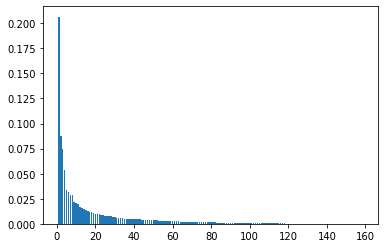

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, train_size=0.7,test_size=0.3,random_state=100)

#Applying PCA on the data set
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized',random_state=42)
pca.fit(X_train)
pca.components_
pca.explained_variance_ratio_

#plot the variance 
import matplotlib.pyplot as plt
import seaborn as sns
var = pca.explained_variance_ratio_
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [31]:
#Calculate the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.20650793, 0.29408607, 0.36875206, 0.42203338, 0.45581483,
       0.48703857, 0.51588414, 0.54452281, 0.56634134, 0.58683092,
       0.60657688, 0.62363175, 0.63944598, 0.65460533, 0.66802276,
       0.68034223, 0.69210826, 0.70377792, 0.71425718, 0.72425049,
       0.73400516, 0.74370828, 0.75284959, 0.76187162, 0.77008032,
       0.77821411, 0.78575851, 0.79310842, 0.79963098, 0.80593969,
       0.81218321, 0.8182066 , 0.82366671, 0.82905221, 0.83427103,
       0.83924974, 0.84418263, 0.8490133 , 0.8537513 , 0.85841016,
       0.86286374, 0.86722958, 0.87152575, 0.87569978, 0.87983381,
       0.88393956, 0.88799454, 0.89171048, 0.89522709, 0.89868239,
       0.90209094, 0.90539973, 0.90866381, 0.91178852, 0.91484499,
       0.91779503, 0.92072252, 0.92348886, 0.92610034, 0.92868229,
       0.93118395, 0.93359577, 0.93591482, 0.93808916, 0.9402556 ,
       0.94227541, 0.94420145, 0.94611482, 0.94801939, 0.94980793,
       0.95157652, 0.95328023, 0.95493914, 0.95653214, 0.95810

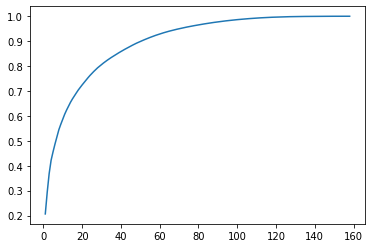

In [32]:
#Making the scree plot
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [33]:
# Lets consider PCA with 60 components as 60 components capture around 93% variance
pc2 = PCA(n_components=60, random_state=42)
train_pca = pc2.fit_transform(X_train)
train_pca.shape

(20985, 60)

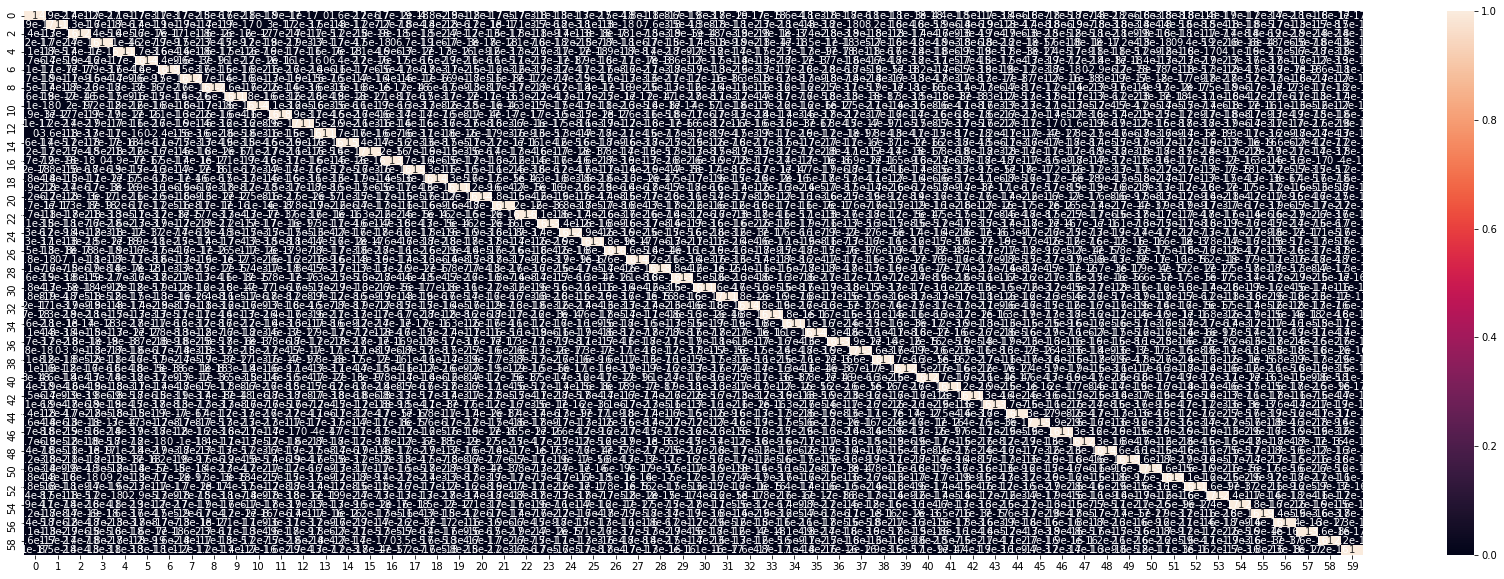

In [34]:
train_pca_t = train_pca.transpose()
corrmat = np.corrcoef(train_pca_t.transpose())
corrm = np.corrcoef(train_pca_t)
# plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (30,10))
sns.heatmap(corrm,annot = True)


In [35]:
# The plot indicates that there is no correlation between the components

In [36]:
#Applying selected components to the test data
test_pca = pc2.transform(X_test)
test_pca.shape

(8994, 60)

## Logistic Regression with PCA

In [37]:
# Perform logistic regression. Using the parameter class_weight = 'balanced' for dealing with data imbalance.
# The value 'balanced' for class_weight provides a weight for both class butplaces more emphasis on the minority class.

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight = 'balanced')
lr_model = lr.fit(train_pca,y_train)

In [38]:
from sklearn import metrics
pred_test= lr_model.predict_proba(test_pca)[:,1]


# pred_test= lr_model.predict_proba(train_pca)[:,1]

In [39]:
pred_test_df = pd.DataFrame(pred_test)
pred_test_df.head()

0
0  0.001811
1  0.056741
2  0.070450
3  0.394577
4  0.816286

In [40]:
y_test_df = pd.DataFrame(y_test)


# y_test_df = pd.DataFrame(y_train)
y_test_df.head()

churn
76438      0
72869      0
86053      0
29093      0
96385      0

In [41]:
pred_test_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True,inplace=True)
y_pred_fin = pd.concat([y_test_df, pred_test_df ],axis=1)
y_pred_fin.head()

churn         0
0      0  0.001811
1      0  0.056741
2      0  0.070450
3      0  0.394577
4      0  0.816286

In [42]:
y_pred_fin= y_pred_fin.rename(columns={ 0 : 'Churn_Prob'})
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_fin.churn,y_pred_fin.Churn_Prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8984557939418397


In [43]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

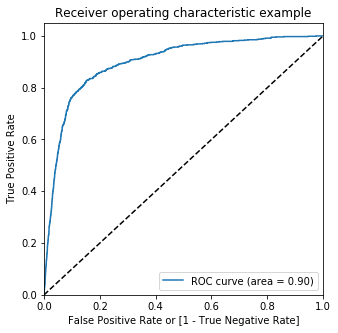

In [44]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_fin.churn, y_pred_fin.Churn_Prob, drop_intermediate = False )
draw_roc(y_pred_fin.churn, y_pred_fin.Churn_Prob)

In [45]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_fin[i]= y_pred_fin.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_pred_fin.head()



churn  Churn_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.001811    1    0    0    0    0    0    0    0    0    0
1      0    0.056741    1    0    0    0    0    0    0    0    0    0
2      0    0.070450    1    0    0    0    0    0    0    0    0    0
3      0    0.394577    1    1    1    1    0    0    0    0    0    0
4      0    0.816286    1    1    1    1    1    1    1    1    1    0

In [46]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_fin.churn, y_pred_fin[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.090616  1.000000  0.000000
0.1   0.1  0.431510  0.976687  0.377185
0.2   0.2  0.588170  0.952147  0.551901
0.3   0.3  0.692239  0.910429  0.670498
0.4   0.4  0.773404  0.874847  0.763296
0.5   0.5  0.830443  0.835583  0.829930
0.6   0.6  0.869246  0.788957  0.877247
0.7   0.7  0.897487  0.717791  0.915393
0.8   0.8  0.913498  0.554601  0.949260
0.9   0.9  0.915944  0.278528  0.979460


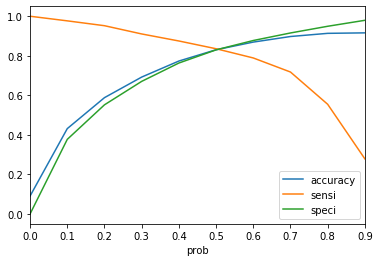

In [47]:
# Let's plot accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [48]:
# Optimal cut off probability is 0.5

y_pred_fin['Final_Predicted'] = y_pred_fin.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [49]:
y_pred_fin.head()

churn  Churn_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  \
0      0    0.001811    1    0    0    0    0    0    0    0    0    0   
1      0    0.056741    1    0    0    0    0    0    0    0    0    0   
2      0    0.070450    1    0    0    0    0    0    0    0    0    0   
3      0    0.394577    1    1    1    1    0    0    0    0    0    0   
4      0    0.816286    1    1    1    1    1    1    1    1    1    0   

   Final_Predicted  
0                0  
1                0  
2                0  
3                0  
4                1

In [50]:
# Metrics for Test data

print( "Accuracy: " ,metrics.accuracy_score(y_pred_fin.churn, y_pred_fin.Final_Predicted))

confusion2 = metrics.confusion_matrix(y_pred_fin.churn, y_pred_fin.Final_Predicted )
print("\nConfusion Matrix")
print(confusion2)
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

print('\nSensitivity/ True Positive Rate/ Recall: ' ,TP / float(TP+FN))
print('\nSpecificity: ' ,TN / float(TN+FP))
print('\nFalse Positive Rate: ' ,FP / float(FP+TN))
print('\nPrecision/ Positive predictive value: ', TP/float(TP+FP))
print('\nNegative predictive value: ',TN / float(TN+ FN))
print('\nMisclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy:  0.8304425172337113

Confusion Matrix
[[6788 1391]
 [ 134  681]]

Sensitivity/ True Positive Rate/ Recall:  0.8355828220858895

Specificity:  0.8299303093287688

False Positive Rate:  0.1700696906712312

Precision/ Positive predictive value:  0.32866795366795365

Negative predictive value:  0.9806414331118174

Misclassification Rate:  0.16955748276628863


In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_pred_fin.churn, y_pred_fin.Final_Predicted))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8179
           1       0.33      0.84      0.47       815

    accuracy                           0.83      8994
   macro avg       0.65      0.83      0.69      8994
weighted avg       0.92      0.83      0.86      8994



### Decision tree classifier

In [52]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 
dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_default.fit(train_pca,y_train)

# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions on training data
y_pred_default_t = dt_default.predict(train_pca)


print(classification_report(y_train,y_pred_default_t))
print(confusion_matrix(y_train,y_pred_default_t))
print('Accuracy Score', accuracy_score(y_train,y_pred_default_t))


# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions on test data
y_pred_default = dt_default.predict(test_pca)

print('\n')
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('Accuracy Score', accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90     19211
           1       0.31      0.77      0.44      1774

    accuracy                           0.83     20985
   macro avg       0.64      0.81      0.67     20985
weighted avg       0.92      0.83      0.86     20985

[[16117  3094]
 [  402  1372]]
Accuracy Score 0.8334048129616393


              precision    recall  f1-score   support

           0       0.97      0.83      0.90      8179
           1       0.30      0.73      0.43       815

    accuracy                           0.82      8994
   macro avg       0.64      0.78      0.66      8994
weighted avg       0.91      0.82      0.85      8994

[[6805 1374]
 [ 220  595]]
Accuracy Score 0.8227707360462531


In [53]:
confusion_tree = confusion_matrix(y_test,y_pred_default)
TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Accuracy Score', accuracy_score(y_test,y_pred_default))
print('\nSensitivity/ True Positive Rate/ Recall: ' ,TP / float(TP+FN))
print('\nSpecificity: ' ,TN / float(TN+FP))
print('\nFalse Positive Rate: ' ,FP / float(FP+TN))
print('\nPrecision/ Positive predictive value: ', TP/float(TP+FP))
print('\nNegative predictive value: ',TN / float(TN+ FN))
print('\nMisclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))


Accuracy Score 0.8227707360462531

Sensitivity/ True Positive Rate/ Recall:  0.7300613496932515

Specificity:  0.8320088030321555

False Positive Rate:  0.16799119696784448

Precision/ Positive predictive value:  0.3021838496698832

Negative predictive value:  0.9686832740213523

Misclassification Rate:  0.17722926395374694


# Hyperparameter tuning for the Decision Tree

In [54]:
# lets tune hyper parameters like max_depth,  min_samples_leaf, min_samples_split

# max_depth: The max_depth parameter denotes maximum depth of the tree. It can take any integer value or None. 
# If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split 
# samples. By default, it takes “None” value.

# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy",return_train_score = True)
tree.fit(train_pca,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'m

In [55]:
y_train.shape

(20985,)

In [56]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.141610      0.012822         0.001401        0.000480   
1       0.243349      0.006462         0.002590        0.000810   
2       0.342282      0.018203         0.001202        0.000397   
3       0.434423      0.019452         0.001599        0.000492   
4       0.527796      0.018005         0.001405        0.000488   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.715988           0.715273   
1               2  {'max_depth': 2}           0.705742           0.703121   
2               3  {'max_depth': 3}           0.846319           0.830117   
3               4  {'max_depth': 4}           0.764594           0.798189   
4               5  {'max_depth': 5}           0.794377           0.775554   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.728377           0.715035           0.708363         0.716607   
1           0.628782           0.703121           0.694067         0.686967   
2           0.796045           0.865857           0.830355         0.833738   
3           0.815821           0.798904           0.792947         0.794091   
4           0.805575           0.812962           0.802001         0.798094   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.006498               38            0.712771            0.713426   
1        0.029361               39            0.700381            0.701513   
2        0.022957               32            0.853645            0.827675   
3        0.016635               37            0.772754            0.803431   
4        0.012761               36            0.807184            0.785919   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.733024            0.711997            0.714677   
1            0.635871            0.700083            0.704074   
2            0.798189            0.860853            0.840124   
3            0.814034            0.809209            0.802538   
4            0.813021            0.822790            0.812843   

   mean_train_score  std_train_score  
0          0.717179         0.007971  
1          0.688385         0.026294  
2          0.836097         0.022113  
3          0.800393         0.014433  
4          0.808351         0.012289

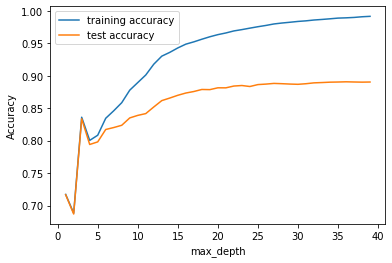

In [57]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# As the max_depth increases, the accuracy for both test and training data increases till the depth is between 15 to 20.
# After that, the test accuracy remains more or less the same whereas the training accuracy increases.

In [58]:
## Lets tune min sample leaf
# min_samples_leaf: min_samples_leaf: The minimum number of samples required to be at a leaf node. 
# If an integer value is taken then consider - -min_samples_leaf as the minimum no. If float, then it shows percentage. 
# By default, it takes “1” value.

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy",return_train_score = True)
tree.fit(train_pca,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'m

In [59]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.188443      0.068869         0.002010        0.000018   
1       1.005122      0.056980         0.001999        0.000628   
2       0.971424      0.037054         0.001797        0.000400   
3       0.919759      0.033859         0.001791        0.000423   
4       0.902407      0.053308         0.001799        0.000423   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.858947   
1                     25  {'min_samples_leaf': 25}           0.811056   
2                     45  {'min_samples_leaf': 45}           0.789135   
3                     65  {'min_samples_leaf': 65}           0.777937   
4                     85  {'min_samples_leaf': 85}           0.775077   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.859185           0.862997           0.866571           0.860138   
1           0.812723           0.810579           0.815583           0.819871   
2           0.789850           0.790326           0.781034           0.787706   
3           0.772695           0.790565           0.775077           0.803908   
4           0.767215           0.791518           0.780081           0.786752   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.861568        0.002887                1            0.944544   
1         0.813962        0.003434                2            0.851799   
2         0.787610        0.003405                4            0.828985   
3         0.784036        0.011693                6            0.817072   
4         0.780129        0.008554                8            0.805456   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.948237            0.945139            0.949130   
1            0.854956            0.845783            0.865261   
2            0.826126            0.815463            0.812723   
3            0.799440            0.810758            0.805158   
4            0.786157            0.807958            0.799083   

   split4_train_score  mean_train_score  std_train_score  
0            0.944127          0.946235         0.002044  
1            0.859245          0.855409         0.006598  
2            0.821718          0.821003         0.006160  
3            0.828091          0.812104         0.009907  
4            0.806707          0.801072         0.008060

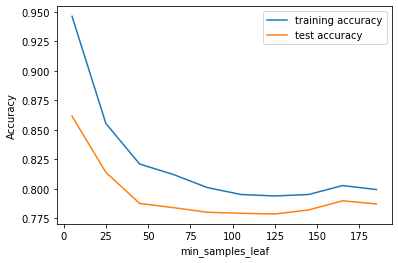

In [60]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [61]:
## Tuning min sample split

# min_samples_split: This tells above the minimum no. of samples reqd. to split an internal node. 
# If an integer value is taken then consider min_samples_split as the minimum no. If float, then it shows percentage. 
# By default, it takes “2” value.

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy", return_train_score = True)
tree.fit(train_pca,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'m

In [62]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.369347      0.097589         0.001993        0.001093   
1       1.298141      0.040718         0.002392        0.001019   
2       1.268219      0.031193         0.001993        0.000002   
3       1.240906      0.050184         0.002190        0.000398   
4       1.229322      0.059179         0.001804        0.000759   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}           0.885394   
1                      25  {'min_samples_split': 25}           0.845366   
2                      45  {'min_samples_split': 45}           0.829640   
3                      65  {'min_samples_split': 65}           0.811770   
4                      85  {'min_samples_split': 85}           0.807243   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.892781           0.889921           0.890636           0.881344   
1           0.854420           0.857517           0.855373           0.850369   
2           0.831785           0.836550           0.825590           0.833214   
3           0.817965           0.815106           0.808911           0.816774   
4           0.812723           0.806528           0.793662           0.806290   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.888015        0.004113                1            0.995413   
1         0.852609        0.004301                2            0.943352   
2         0.831356        0.003655                3            0.914522   
3         0.814105        0.003330                4            0.888909   
4         0.805289        0.006274                5            0.876995   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.994758            0.995771            0.995354   
1            0.942280            0.947939            0.942280   
2            0.905647            0.913212            0.905170   
3            0.881999            0.879497            0.880986   
4            0.874375            0.861508            0.858530   

   split4_train_score  mean_train_score  std_train_score  
0            0.995056          0.995270         0.000342  
1            0.950619          0.945294         0.003385  
2            0.921909          0.912092         0.006212  
3            0.895342          0.885347         0.005950  
4            0.871277          0.868537         0.007248

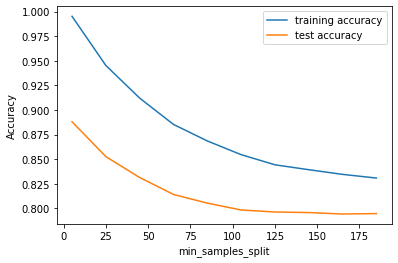

In [63]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_min_samples_split"], scores["mean_test_score"],  label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [137]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                           refit='recall_score',
                          cv = n_folds, verbose = 1, n_jobs = -1,error_score='raise',return_train_score=True)

# Fit the grid search to the data
grid_search.fit(train_pca,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  9.4min finished


GridSearchCV(cv=5, error_score='raise',
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid=

In [138]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.763086      0.021946         0.003590        0.000488   
1       1.741144      0.014906         0.002992        0.000631   
2       1.766078      0.022108         0.002793        0.000399   
3       1.762886      0.017555         0.003391        0.001017   
4       1.771863      0.014281         0.003391        0.001850   

  param_criterion param_max_depth param_min_samples_leaf  \
0         entropy               5                      5   
1         entropy               5                      5   
2         entropy               5                      5   
3         entropy               5                      5   
4         entropy               5                      5   

  param_min_samples_split                                             params  \
0                       5  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
1                      25  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2                      45  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
3                      65  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4                      85  {'criterion': 'entropy', 'max_depth': 5, 'min_...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.806290           0.786038           0.822492           0.779843   
1           0.806290           0.786038           0.822492           0.779843   
2           0.807243           0.786038           0.822492           0.779843   
3           0.807720           0.786038           0.822731           0.778890   
4           0.807243           0.786038           0.822492           0.778890   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.821301         0.803193        0.017604               19   
1           0.821301         0.803193        0.017604               19   
2           0.821301         0.803383        0.017642               17   
3           0.821301         0.803336        0.017972               18   
4           0.821301         0.803193        0.017898               19   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.816297            0.795628            0.837265   
1            0.816297            0.795628            0.837265   
2            0.816655            0.795628            0.837265   
3            0.816655            0.795628            0.837265   
4            0.816655            0.795628            0.837265   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.792233             0.82827          0.813939         0.017672  
1            0.792233             0.82827          0.813939         0.017672  
2            0.792233             0.82827          0.814010         0.017682  
3            0.790624             0.82827          0.813688         0.018085  
4            0.790624             0.82827          0.813688         0.018085

In [139]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8323087919942818
DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [148]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",
                                  class_weight='balanced', 
                                  random_state = 100, max_depth=10, 
                                  min_samples_leaf=5, min_samples_split=5)
clf_gini.fit(train_pca,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [149]:
y_pred_default = clf_gini.predict(test_pca)
confusion_tree_hyper=confusion_matrix(y_test,y_pred_default)
# confusion_tree_hyper

In [150]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions on test data
print('\n')
print(classification_report(y_test,y_pred_default))
print(confusion_tree_hyper)
print('Accuracy Score', accuracy_score(y_test,y_pred_default))



              precision    recall  f1-score   support

           0       0.96      0.86      0.91      8179
           1       0.32      0.66      0.43       815

    accuracy                           0.84      8994
   macro avg       0.64      0.76      0.67      8994
weighted avg       0.90      0.84      0.86      8994

[[7018 1161]
 [ 280  535]]
Accuracy Score 0.8397820769401824


In [151]:
TP = confusion_tree_hyper[1,1] # true positive 
TN = confusion_tree_hyper[0,0] # true negatives
FP = confusion_tree_hyper[0,1] # false positives
FN = confusion_tree_hyper[1,0] # false negatives

print('Accuracy Score', accuracy_score(y_test,y_pred_default))
print('\nSensitivity/ True Positive Rate/ Recall: ' ,TP / float(TP+FN))
print('\nSpecificity: ' ,TN / float(TN+FP))
print('\nFalse Positive Rate: ' ,FP / float(FP+TN))
print('\nPrecision/ Positive predictive value: ', TP/float(TP+FP))
print('\nNegative predictive value: ',TN / float(TN+ FN))
print('\nMisclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))


Accuracy Score 0.8397820769401824

Sensitivity/ True Positive Rate/ Recall:  0.656441717791411

Specificity:  0.8580511064922363

False Positive Rate:  0.1419488935077638

Precision/ Positive predictive value:  0.3154481132075472

Negative predictive value:  0.9616333241984105

Misclassification Rate:  0.16021792305981766


### Random Forest Classifier

In [71]:
# Random forest

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

# fit
rfc.fit(train_pca,y_train)

# Making predictions
y_pred_default = rfc.predict(test_pca)

In [72]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
# confusion_rf

In [73]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions on test data
print('\n')
print(classification_report(y_test,y_pred_default))
print(confusion_rf)
print('Accuracy Score', accuracy_score(y_test,y_pred_default))



              precision    recall  f1-score   support

           0       0.92      0.99      0.96      8179
           1       0.66      0.17      0.26       815

    accuracy                           0.92      8994
   macro avg       0.79      0.58      0.61      8994
weighted avg       0.90      0.92      0.89      8994

[[8108   71]
 [ 680  135]]
Accuracy Score 0.9164998888147654


In [74]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

print('Accuracy Score', accuracy_score(y_test,y_pred_default))
print('\nSensitivity/ True Positive Rate/ Recall: ' ,TP / float(TP+FN))
print('\nSpecificity: ' ,TN / float(TN+FP))
print('\nFalse Positive Rate: ' ,FP / float(FP+TN))
print('\nPrecision/ Positive predictive value: ', TP/float(TP+FP))
print('\nNegative predictive value: ',TN / float(TN+ FN))
print('\nMisclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score 0.9164998888147654

Sensitivity/ True Positive Rate/ Recall:  0.1656441717791411

Specificity:  0.9913192321799731

False Positive Rate:  0.008680767820026898

Precision/ Positive predictive value:  0.6553398058252428

Negative predictive value:  0.9226217569412836

Misclassification Rate:  0.08350011118523461


In [75]:
#Lets do some hyper parameter tuning 
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,return_train_score=True)
rf_with_pca.fit(train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [76]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.449306      0.198040         0.079187        0.004260   
1      12.454304      0.840918         0.092153        0.006327   
2      16.508866      0.862987         0.113895        0.012025   
3      15.035813      1.584368         0.075002        0.011858   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.809149           0.825113   
1               7   {'max_depth': 7}           0.877770           0.880391   
2              12  {'max_depth': 12}           0.906600           0.912557   
3              17  {'max_depth': 17}           0.913748           0.918037   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.824637           0.815821           0.807482         0.816440   
1           0.897784           0.884918           0.885633         0.885299   
2           0.921849           0.919943           0.914463         0.915082   
3           0.923040           0.924946           0.914224         0.918799   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.007432                4            0.810817            0.828985   
1        0.006884                3            0.907851            0.904217   
2        0.005443                2            0.964439            0.966881   
3        0.004534                1            0.979152            0.981832   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.827079            0.822671            0.819157   
1            0.905170            0.898261            0.906481   
2            0.961937            0.963128            0.963784   
3            0.980939            0.980105            0.980343   

   mean_train_score  std_train_score  
0          0.821742         0.006447  
1          0.904396         0.003303  
2          0.964034         0.001646  
3          0.980474         0.000890

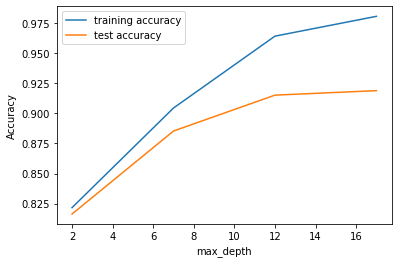

In [77]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [78]:
# Tuning n_estimators
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy", n_jobs=-1,return_train_score=True)
rf.fit(train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              r

In [79]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      15.219116      0.685960         0.112096        0.011660   
1      75.312062      3.228610         0.514823        0.008749   
2     140.138957      6.616515         0.939090        0.087300   
3     170.078065     17.030026         1.064755        0.235426   

  param_n_estimators                  params  split0_test_score  \
0                100   {'n_estimators': 100}           0.899929   
1                500   {'n_estimators': 500}           0.901120   
2                900   {'n_estimators': 900}           0.900405   
3               1300  {'n_estimators': 1300}           0.901835   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.907791           0.915416           0.908030           0.904217   
1           0.908268           0.918037           0.909936           0.903979   
2           0.907791           0.917560           0.910650           0.903503   
3           0.907791           0.917560           0.908506           0.903741   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.907076        0.005104                4            0.947701   
1         0.908268        0.005791                1            0.948654   
2         0.907982        0.005939                2            0.949190   
3         0.907887        0.005437                3            0.948237   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.947999            0.942340            0.943055   
1            0.948952            0.944722            0.946390   
2            0.948892            0.945616            0.944663   
3            0.947641            0.944901            0.945616   

   split4_train_score  mean_train_score  std_train_score  
0            0.945616          0.945342         0.002321  
1            0.948594          0.947462         0.001648  
2            0.948416          0.947355         0.001851  
3            0.949249          0.947129         0.001627

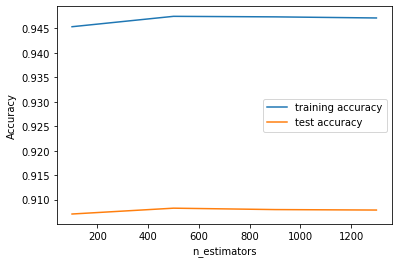

In [80]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_n_estimators"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [81]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy", n_jobs=-1,return_train_score=True)
rf.fit(train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              r

In [82]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       9.531917      0.340493         0.124867        0.006095   
1      17.999878      0.396605         0.114695        0.011020   
2      31.434960      1.178786         0.118881        0.012855   
3      45.411003      1.152404         0.139225        0.030702   
4      49.893267      5.606399         0.071601        0.016157   

  param_max_features                params  split0_test_score  \
0                  4   {'max_features': 4}           0.900167   
1                  8   {'max_features': 8}           0.900882   
2                 14  {'max_features': 14}           0.899929   
3                 20  {'max_features': 20}           0.899214   
4                 24  {'max_features': 24}           0.900405   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.906123           0.914701           0.910412           0.904217   
1           0.907315           0.913271           0.909697           0.903979   
2           0.909697           0.915654           0.910889           0.906362   
3           0.908268           0.913271           0.913510           0.906600   
4           0.907791           0.913748           0.912080           0.907076   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.907124        0.005021                4            0.945080   
1         0.907029        0.004319                5            0.949845   
2         0.908506        0.005222                1            0.947105   
3         0.908173        0.005239                3            0.947165   
4         0.908220        0.004648                2            0.948118   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.946331            0.943174            0.945556   
1            0.947939            0.945139            0.943948   
2            0.950441            0.945139            0.943888   
3            0.948952            0.944544            0.944842   
4            0.950739            0.944603            0.944842   

   split4_train_score  mean_train_score  std_train_score  
0            0.945735          0.945175         0.001078  
1            0.947582          0.946891         0.002099  
2            0.948296          0.946974         0.002310  
3            0.948773          0.946855         0.001874  
4            0.948237          0.947308         0.002310

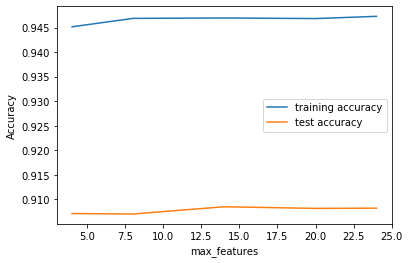

In [83]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_max_features"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [84]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy", n_jobs=-1,return_train_score = True)
rf.fit(train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [85]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      13.877901      0.427176         0.114093        0.007397   
1      12.892933      0.459416         0.112696        0.010172   
2      11.966610      0.308596         0.117683        0.014969   
3      10.998197      0.135660         0.106914        0.004982   
4      11.019540      0.651820         0.099934        0.007093   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.863236   
1                    150  {'min_samples_leaf': 150}           0.855135   
2                    200  {'min_samples_leaf': 200}           0.846557   
3                    250  {'min_samples_leaf': 250}           0.843221   
4                    300  {'min_samples_leaf': 300}           0.835359   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.869431           0.876817           0.870622           0.873958   
1           0.858232           0.865618           0.856326           0.859662   
2           0.853705           0.854658           0.850846           0.858232   
3           0.848463           0.850369           0.837741           0.844174   
4           0.837026           0.842745           0.832976           0.841315   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.870812        0.004589                1            0.884799   
1         0.858995        0.003658                2            0.872647   
2         0.852800        0.003913                3            0.862759   
3         0.844794        0.004408                4            0.859543   
4         0.837884        0.003650                5            0.850488   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.881642            0.881284            0.878127   
1            0.868894            0.867763            0.865618   
2            0.862104            0.854360            0.857041   
3            0.854777            0.849535            0.844174   
4            0.844115            0.841315            0.844174   

   split4_train_score  mean_train_score  std_train_score  
0            0.881999          0.881570         0.002124  
1            0.870264          0.869037         0.002361  
2            0.860793          0.859411         0.003209  
3            0.850667          0.851739         0.005164  
4            0.845544          0.845127         0.003013

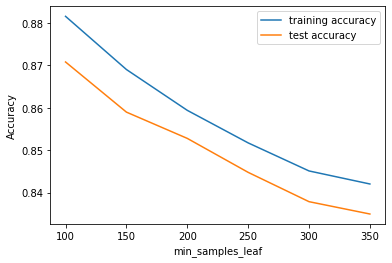

In [86]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



In [87]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy",return_train_score = True)
rf.fit(train_pca, y_train)

# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       7.227095      0.184095         0.052452        0.002931   
1       6.812372      0.092586         0.051662        0.001935   
2       6.503426      0.061698         0.048268        0.002237   
3       6.456371      0.241457         0.047062        0.002041   
4       6.366797      0.302920         0.046278        0.002733   

  param_min_samples_split                      params  split0_test_score  \
0                     200  {'min_samples_split': 200}           0.883726   
1                     250  {'min_samples_split': 250}           0.877293   
2                     300  {'min_samples_split': 300}           0.873005   
3                     350  {'min_samples_split': 350}           0.870384   
4                     400  {'min_samples_split': 400}           0.862044   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.889445           0.900643           0.895640           0.889683   
1           0.881344           0.893257           0.889445           0.887539   
2           0.878723           0.886586           0.884203           0.884680   
3           0.871575           0.883488           0.882535           0.877293   
4           0.872051           0.881820           0.873719           0.873958   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.891827        0.005799                1            0.914701   
1         0.885776        0.005729                2            0.904336   
2         0.881439        0.004963                3            0.899392   
3         0.877055        0.005404                4            0.895997   
4         0.872719        0.006321                5            0.890457   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.915654            0.911484            0.910174   
1            0.904634            0.902073            0.901537   
2            0.897308            0.895104            0.896474   
3            0.894210            0.890994            0.888611   
4            0.887896            0.884620            0.881642   

   split4_train_score  mean_train_score  std_train_score  
0            0.913212          0.913045         0.002013  
1            0.903383          0.903193         0.001218  
2            0.899452          0.897546         0.001686  
3            0.889624          0.891887         0.002791  
4            0.885454          0.886014         0.002989

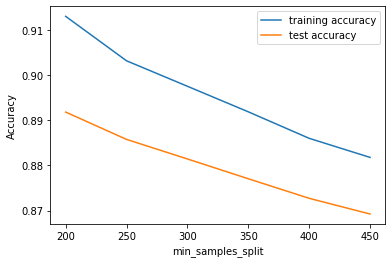

In [88]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_min_samples_split"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [89]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
#                            refit='recall_score' ,
                          cv = 5, n_jobs=-1, verbose = 1)

In [90]:
# Fit the grid search to the data
grid_search.fit(train_pca, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 12.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [91]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8684774839170837 using {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [92]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced', max_depth=10, min_samples_leaf=100, 
                             min_samples_split=200, max_features=8, n_estimators=200)

In [93]:
# fit
rfc.fit(train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
# predict
y_pred_default = rfc.predict(test_pca)

In [95]:
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score:  ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      8179
           1       0.37      0.75      0.50       815

    accuracy                           0.86      8994
   macro avg       0.67      0.81      0.71      8994
weighted avg       0.92      0.86      0.88      8994

[[7154 1025]
 [ 203  612]]
accuracy_score:   0.8634645319101624


In [96]:
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print('Accuracy Score', accuracy_score(y_test,y_pred_default))
print('\nSensitivity/ True Positive Rate/ Recall: ' ,TP / float(TP+FN))
print('\nSpecificity: ' ,TN / float(TN+FP))
print('\nFalse Positive Rate: ' ,FP / float(FP+TN))
print('\nPrecision/ Positive predictive value: ', TP/float(TP+FP))
print('\nNegative predictive value: ',TN / float(TN+ FN))
print('\nMisclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score 0.8634645319101624

Sensitivity/ True Positive Rate/ Recall:  0.750920245398773

Specificity:  0.87467905611933

False Positive Rate:  0.12532094388067

Precision/ Positive predictive value:  0.37385461209529625

Negative predictive value:  0.972407231208373

Misclassification Rate:  0.13653546808983766


# ********************************************************************************************
# Results

##### Logistic Regression with PCA

| Accuracy | Sensitivity | Specificity | False Positive Rate | Precision | Negative Predictive Value | Misclassification Rate |
|----------|-------------|-------------|---------------------|-----------|---------------------------|------------------------|
|    83%   |    84%      |    83%      |        17%          |    33%    |           98%             |       17%              |

##### Decision Tree with PCA - before tuning the hyperparamters

| Accuracy | Sensitivity | Specificity | False Positive Rate | Precision | Negative Predictive Value | Misclassification Rate |
|----------|-------------|-------------|---------------------|-----------|---------------------------|------------------------|
|    83%   |    73%      |    83%      |        17%          |    30%    |           97%             |       18%              |

##### Decision Tree with PCA - after tuning the hyperparamters

| Accuracy | Sensitivity | Specificity | False Positive Rate | Precision | Negative Predictive Value | Misclassification Rate |
|----------|-------------|-------------|---------------------|-----------|---------------------------|------------------------|
|    84%   |    66%      |    86%      |        14%          |    32%    |           96%             |       16%              |

#####  Random Forest with PCA

| Accuracy | Sensitivity | Specificity | False Positive Rate | Precision | Negative Predictive Value | Misclassification Rate |
|----------|-------------|-------------|---------------------|-----------|---------------------------|------------------------|
|    86%   |    75%      |    88%      |        12%          |    38%    |           97%             |       14%              |


##### Conclusion
The logistic regression model with PCA seem to be a better choice as it has got better sensitivity. So, this model would predict more number of customers who are likelt to churn.



### Finding the top features

In [97]:
X.corr()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
arpu_6                1.000000  0.515676  0.425558     0.361883     0.172150   
arpu_7                0.515676  1.000000  0.658685     0.180046     0.354098   
arpu_8                0.425558  0.658685  1.000000     0.110573     0.237115   
onnet_mou_6           0.361883  0.180046  0.110573     1.000000     0.732515   
onnet_mou_7           0.172150  0.354098  0.237115     0.732515     1.000000   
onnet_mou_8           0.138748  0.286080  0.410502     0.601187     0.797127   
offnet_mou_6          0.539479  0.302693  0.218429     0.003288    -0.053106   
offnet_mou_7          0.282874  0.522941  0.368500    -0.058673     0.000948   
offnet_mou_8          0.240440  0.412817  0.588413    -0.048834     0.002267   
roam_ic_mou_6         0.127644  0.099652  0.098346     0.001364     0.022639   
roam_ic_mou_7         0.093896  0.120625  0.085536     0.023466    -0.004722   
roam_ic_mou_8         0.106279  0.127120  0.128643     0.039909     0.028989   
roam_og_mou_6         0.176462  0.116646  0.119402     0.043063     0.056105   
roam_og_mou_7         0.123062  0.164202  0.107582     0.063692     0.040941   
roam_og_mou_8         0.129056  0.162917  0.181333     0.072514     0.070359   
loc_og_t2t_mou_6      0.194653  0.104235  0.104829     0.380153     0.264182   
loc_og_t2t_mou_7      0.134483  0.196269  0.165062     0.292848     0.370282   
loc_og_t2t_mou_8      0.122986  0.167433  0.259074     0.248579     0.295330   
loc_og_t2m_mou_6      0.346555  0.191593  0.200177    -0.054064    -0.101825   
loc_og_t2m_mou_7      0.224758  0.316084  0.279744    -0.088479    -0.068861   
loc_og_t2m_mou_8      0.201885  0.260624  0.413138    -0.086399    -0.072309   
loc_og_t2f_mou_6      0.149583  0.108848  0.136427    -0.082296    -0.097073   
loc_og_t2f_mou_7      0.106192  0.148656  0.152001    -0.095925    -0.089335   
loc_og_t2f_mou_8      0.099008  0.123663  0.196294    -0.093138    -0.088047   
loc_og_t2c_mou_6      0.082372  0.018453  0.006951     0.062791     0.042722   
loc_og_t2c_mou_7      0.006727  0.076090  0.031178     0.035238     0.076359   
loc_og_t2c_mou_8      0.009207  0.048523  0.100947     0.040363     0.071673   
loc_og_mou_6          0.354210  0.197757  0.199486     0.181649     0.084439   
loc_og_mou_7          0.236592  0.335922  0.289866     0.113610     0.173471   
loc_og_mou_8          0.208015  0.274516  0.424580     0.081373     0.118504   
std_og_t2t_mou_6      0.275856  0.129054  0.056299     0.856769     0.629951   
std_og_t2t_mou_7      0.108434  0.272968  0.168706     0.619965     0.864855   
std_og_t2t_mou_8      0.081488  0.220322  0.316444     0.509569     0.696961   
std_og_t2m_mou_6      0.319790  0.172033  0.076827     0.043681     0.005276   
std_og_t2m_mou_7      0.141245  0.335565  0.202244    -0.010019     0.045882   
std_og_t2m_mou_8      0.108195  0.260917  0.359551    -0.000093     0.050195   
std_og_t2f_mou_6      0.066566  0.043312  0.058414    -0.060263    -0.065663   
std_og_t2f_mou_7      0.040845  0.069701  0.068993    -0.064714    -0.057894   
std_og_t2f_mou_8      0.038146  0.054530  0.097563    -0.059171    -0.056571   
std_og_mou_6          0.415074  0.211172  0.095147     0.601357     0.422328   
std_og_mou_7          0.177167  0.423667  0.257814     0.405790     0.607966   
std_og_mou_8          0.131186  0.327240  0.458462     0.337914     0.497905   
isd_og_mou_6          0.204398  0.121265  0.117463    -0.061365    -0.066347   
isd_og_mou_7          0.115191  0.198137  0.142330    -0.063060    -0.060315   
isd_og_mou_8          0.126238  0.152626  0.213265    -0.055422    -0.055555   
spl_og_mou_6          0.143000  0.046468  0.016337     0.104552     0.060029   
spl_og_mou_7          0.038177  0.130950  0.055108     0.074847     0.138456   
spl_og_mou_8          0.034376  0.103956  0.164469     0.068805     0.124077   
og_others_6           0.131940  0.025276 -0.004236     0.107938     0.049136   
og_others_7             

In [98]:
#Making a copy of X to built a model to find the features responsible for churn
Xfeatures=X.copy()
len(Xfeatures.columns)

158

In [99]:
#Removing the highly correlated features
coll=['max_rech_data_8','jul_vbc_3g','std_ic_t2t_mou_8','ic_others_7','max_rech_amt_8','total_rech_data_6','max_rech_data_7','arpu_3g_6','max_rech_data_7','total_og_mou_7','arpu_7','total_ic_mou_7','std_ic_t2t_mou_6','isd_ic_mou_7','std_ic_t2f_mou_7','loc_ic_t2f_mou_6','fb_user_8','offnet_mou_8','std_og_t2f_mou_8','loc_og_t2m_mou_7','total_rech_num_7','loc_ic_t2m_mou_8','fb_user_7','loc_og_t2f_mou_6','std_og_t2t_mou_7','loc_ic_t2t_mou_8',
                      'loc_og_mou_6','fb_user_6','vol_3g_mb_8','loc_og_t2m_mou_6','vol_3g_mb_6','loc_ic_t2f_mou_8','loc_ic_t2t_mou_7',
                      'loc_og_t2f_mou_7','total_ic_mou_8','sachet_3g_6','loc_og_mou_8','loc_og_t2t_mou_7','offnet_mou_6','std_ic_mou_6','loc_og_t2m_mou_8',
                       'vol_3g_mb_7','std_ic_mou_7','av_rech_amt_data_7','av_rech_amt_data_8','monthly_3g_6','monthly_3g_7','monthly_3g_8','std_og_mou_6','std_og_mou_7','std_og_mou_8','loc_ic_t2m_mou_6','std_og_t2m_mou_7','sachet_3g_7','std_og_t2m_mou_8','std_ic_t2m_mou_8','onnet_mou_8','onnet_mou_7','onnet_mou_6','sachet_3g_8','sachet_2g_8','sachet_2g_7','sachet_2g_6','total_rech_amt_8','isd_og_mou_8','total_rech_amt_6','total_rech_amt_7','arpu_2g_6','arpu_2g_7','arpu_2g_8','isd_og_mou_6','total_ic_mou_6','Avg_rech_amt_6_7','loc_ic_mou_8','av_rech_amt_data_6','loc_ic_mou_7','count_rech_2g_8','count_rech_2g_7','count_rech_2g_6']
Xfeatures=Xfeatures.drop(coll,axis=1)
absCorr = Xfeatures.corr().abs()

s = absCorr.unstack()
so = s.sort_values(kind="quicksort",ascending=False)
so


day_last_rchg_data_8  day_last_rchg_data_8    1.000000
max_rech_amt_7        max_rech_amt_7          1.000000
count_rech_3g_6       count_rech_3g_6         1.000000
max_rech_data_6       max_rech_data_6         1.000000
total_rech_data_8     total_rech_data_8       1.000000
total_rech_data_7     total_rech_data_7       1.000000
last_day_rch_amt_8    last_day_rch_amt_8      1.000000
last_day_rch_amt_7    last_day_rch_amt_7      1.000000
last_day_rch_amt_6    last_day_rch_amt_6      1.000000
max_rech_amt_6        max_rech_amt_6          1.000000
spl_ic_mou_6          spl_ic_mou_6            1.000000
total_rech_num_8      total_rech_num_8        1.000000
total_rech_num_6      total_rech_num_6        1.000000
ic_others_8           ic_others_8             1.000000
ic_others_6           ic_others_6             1.000000
isd_ic_mou_8          isd_ic_mou_8            1.000000
isd_ic_mou_6          isd_ic_mou_6            1.000000
spl_ic_mou_8          spl_ic_mou_8            1.000000
count_rech

In [100]:
len(Xfeatures.columns)

80

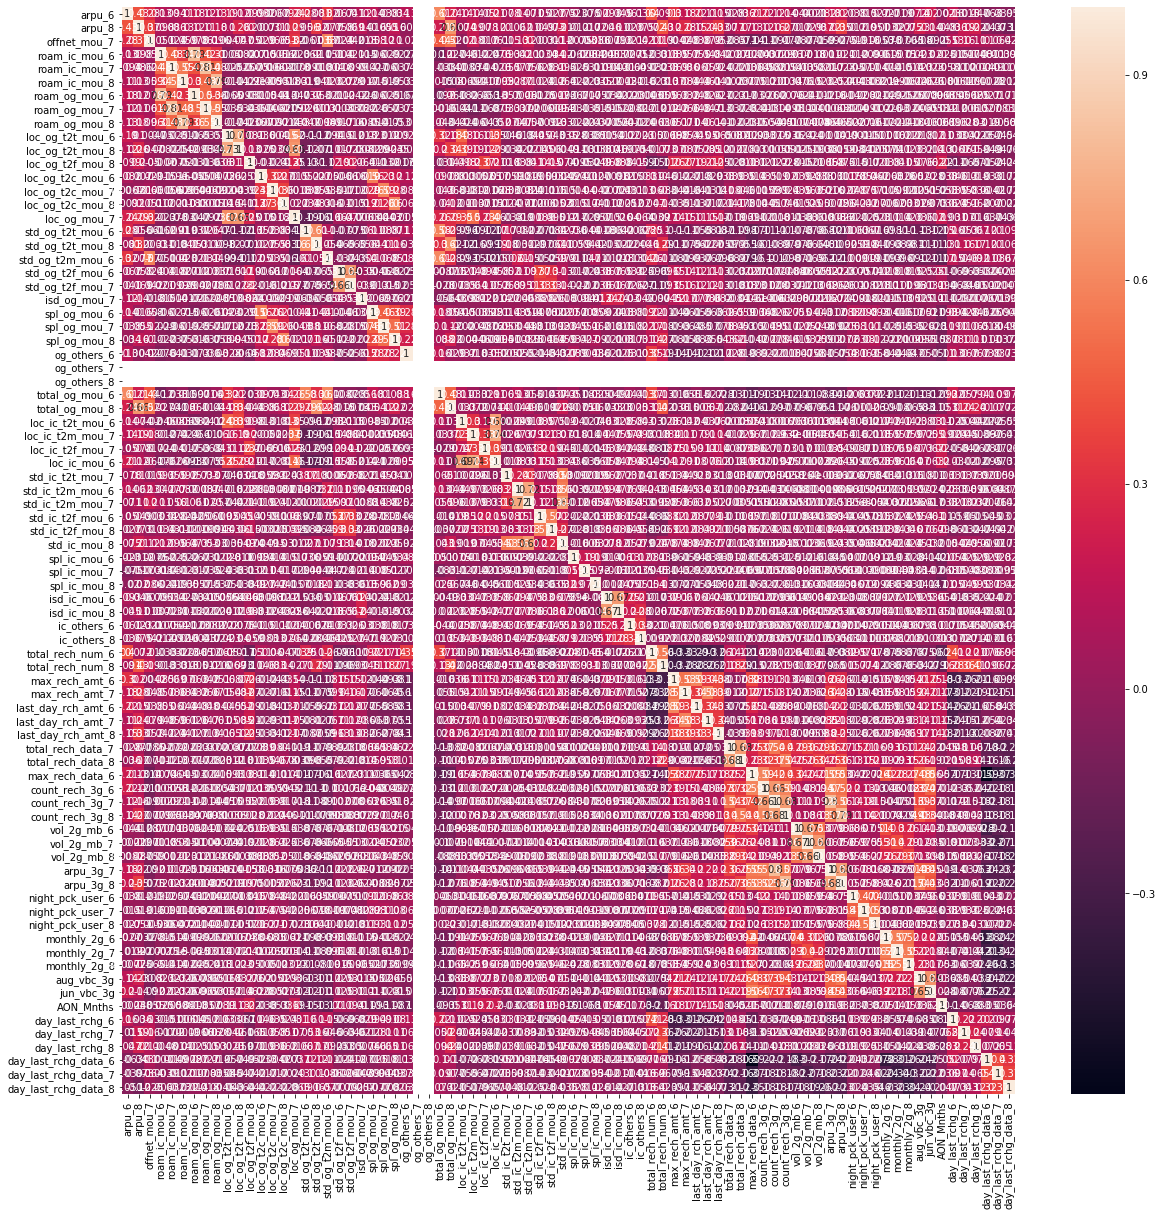

In [101]:

# Checking for correlations

plt.figure(figsize=(20,20))
sns.heatmap(Xfeatures.corr(),annot=True)
plt.show()

In [102]:
Xfeatures.columns
coltobeNorm=Xfeatures.columns

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xfeatures[coltobeNorm] = scaler.fit_transform(Xfeatures[coltobeNorm])

Xfeatures.head()

arpu_6    arpu_8  offnet_mou_7  roam_ic_mou_6  roam_ic_mou_7  \
7   1.461367  3.946965      0.351836       0.027543       0.559940   
8  -0.593383 -1.044433     -0.776955      -0.289063      -0.261011   
13 -0.253756  0.185125     -0.687284       0.169947       3.274791   
16 -0.437879 -0.908148     -0.431007      -0.289063      -0.191639   
17  0.332982 -1.346128     -0.964024      -0.289063      -0.144328   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7        0.521005      -0.022196      -0.091622       0.325772   
8       -0.262426      -0.306920      -0.282981      -0.279917   
13       1.523073      -0.211213       0.252947      -0.257001   
16      -0.262426      -0.306920      -0.013345      -0.279917   
17      -0.143326      -0.306920      -0.154395      -0.067624   

    loc_og_t2t_mou_6  loc_og_t2t_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
7          -0.220251         -0.265638          3.400505         -0.335976   
8           1.314570         -0.457756         -0.423171         -0.335976   
13         -0.231244         -0.295157          1.265625         -0.335976   
16         -0.275089         -0.078290          0.313836         -0.335976   
17         -0.297698         -0.544102         -0.423171         -0.335976   

    loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_7  std_og_t2t_mou_6  \
7          -0.343991         -0.332671      0.803175         -0.498081   
8          -0.343991          1.280117      0.037296         -0.183548   
13         -0.343991         -0.222144     -0.694206          0.740634   
16         -0.343991         -0.332671     -0.188793         -0.488023   
17         -0.343991         -0.332671     -0.860889          2.703314   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2f_mou_6  std_og_t2f_mou_7  \
7          -0.432713         -0.405084          0.855310          3.148026   
8          -0.402656         -0.506086         -0.247342         -0.244985   
13          0.949928          0.168202         -0.247342         -0.244985   
16         -0.457681         -0.480138         -0.247342         -0.244985   
17         -0.466866         -0.539958         -0.247342         -0.244985   

    isd_og_mou_7  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  \
7      -0.128271     -0.070999     -0.497675      0.038975    -0.386731   
8      -0.165841     -0.461600     -0.497675      0.342895    -0.386731   
13     -0.165841     -0.461600     -0.497675     -0.101170    -0.386731   
16     -0.165841     -0.461600     -0.252785     -0.009098    -0.386731   
17     -0.165841     -0.237655     -0.497675     -0.490643     0.184879   

    og_others_7  og_others_8  total_og_mou_6  total_og_mou_8  \
7           0.0          0.0       -0.312750       -0.425683   
8           0.0          0.0       -0.278474       -0.714673   
13          0.0          0.0        0.377644        0.650506   
16          0.0          0.0       -0.544307       -0.614643   
17          0.0          0.0        0.941136       -0.992272   

    loc_ic_t2t_mou_6  loc_ic_t2m_mou_7  loc_ic_t2f_mou_7  loc_ic_mou_6  \
7          -0.048216          0.366460          2.639215      0.708018   
8          -0.397412         -0.785020         -0.453683     -0.580508   
13          0.050944         -0.759772         -0.453683     -0.081574   
16         -0.219353         -0.031961         -0.189082      0.146340   
17         -0.288479         -0.849777         -0.453683     -0.578536   

    std_ic_t2t_mou_7  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2f_mou_6  \
7          -0.054112          1.074898          1.604265          6.730739   
8          -0.387428         -0.098514         -0.414115         -0.282532   
13          0.729845          4.759386          0.008085         -0.282532   
16          1.925336         -0.162277          0.718976         -0.213998   
17         -0.404612         -0.458138         -0.481115         -0.282532   

    std_ic_t2f_mou_8  std_ic_mou_8  spl_ic_mou_6  spl_i

In [103]:
# Splitting into train and test
Xfeatures_train, Xfeatures_test, yfeatures_train, yfeatures_test = train_test_split(Xfeatures, y, train_size=0.7,test_size=0.3,random_state=100)

In [104]:
yfeatures_test.value_counts()

0    8179
1     815
Name: churn, dtype: int64

In [105]:
# Model Building

In [106]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(yfeatures_train,(sm.add_constant(Xfeatures_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20906
Model Family:                Binomial   Df Model:                           78
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3987.2
Date:                Mon, 16 Dec 2019   Deviance:                       7974.5
Time:                        11:59:22   Pearson chi2:                 1.27e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.8667      0.064    -60.483      0.000      -3.992      -3.741
arpu_6                   0.2221      0.057      3.924      0.000       0.111       0.333
arpu_8                  -0.2705      0.090     -3.008      0.003      -0.447      -0.094
offnet_mou_7             0.3163      0.051      6.230      0.000       0.217       0.416
roam_ic_mou_6            0.0387      0.047      0.829      0.407      -0.053       0.130
roam_ic_mou_7            0.0500      0.046      1.088      0.276      -0.040       0.140
roam_ic_mou_8           -0.0482      0.042     -1.140      0.254      -0.131       0.035
roam_og_mou_6            0.0097      0.046      0.212      0.832      -0.080       0.099
roam_og_mou_7            0.0589      0.044      1.338      0.181      -0.027       0.145
roam_og_mou_8            0.2060      0.044      4.728      0.000       0.121       0.291
loc_og_t2t_mou_6         0.2503      0.060      4.170      0.000       0.133       0.368
loc_og_t2t_mou_8        -0.5601      0.124     -4.503      0.000      -0.804      -0.316
loc_og_t2f_mou_8        -0.1941      0.071     -2.751      0.006      -0.332      -0.056
loc_og_t2c_mou_6        -0.0400      0.038     -1.042      0.297      -0.115       0.035
loc_og_t2c_mou_7         0.0117      0.040      0.292      0.771      -0.067       0.091
loc_og_t2c_mou_8         0.0739      0.052      1.432      0.152      -0.027       0.175
loc_og_mou_7            -0.0648      0.073     -0.893      0.372      -0.207       0.077
std_og_t2t_mou_6         0.2928      0.068      4.313      0.000       0.160       0.426
std_og_t2t_mou_8         0.2344      0.080      2.915      0.004       0.077       0.392
std_og_t2m_mou_6         0.2456      0.069      3.573      0.000       0.111       0.380
std_og_t2f_mou_6        -0.0364      0.048     -0.758      0.448      -0.131       0.058
std_og_t2f_mou_7         0.0101      0.048      0.212      0.832      -0.083       0.103
isd_og_mou_7             0.1233      0.029      4.229      0.000       0.066       0.180
spl_og_mou_6            -0.0325      0.041     -0.786      0.432      -0.114       0.049
spl_og_mou_7             0.0741      0.045      1.658      0.097      -0.014       0.162
spl_og_mou_8            -0.2132      0.064     -3.319      0.001      -0.339      -0.087
og_others_6              0.0009      0.031      0.029      0.977      -0.060       0.061
og_others_7           2.952e-16    8.8e-17      3.355      0.001    1.23e-16    4.68e-16
og_others_8           8.623e-17   8.38e-17      1.030      0.303   -7.79e-17     2.5e-16
total_og_mou_6          -0.3623      0.109     -3.328      0.001      -0.576      -0.149
total_og_mou_8          -0.7383      0.121     -6.078      0.000      -0.976      -0.500
loc_ic_t2t_mou_6        -0.0862      0.058     -1.491    

# Feature Selection using RFE

In [107]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 30)             # running RFE with 30 variables as output
rfe = rfe.fit(Xfeatures_train, yfeatures_train)
list(zip(Xfeatures_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_8', True, 1),
 ('offnet_mou_7', True, 1),
 ('roam_ic_mou_6', False, 26),
 ('roam_ic_mou_7', False, 28),
 ('roam_ic_mou_8', False, 29),
 ('roam_og_mou_6', False, 45),
 ('roam_og_mou_7', False, 4),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', True, 1),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', False, 24),
 ('loc_og_t2c_mou_7', False, 41),
 ('loc_og_t2c_mou_8', False, 14),
 ('loc_og_mou_7', False, 15),
 ('std_og_t2t_mou_6', True, 1),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_6', True, 1),
 ('std_og_t2f_mou_6', False, 35),
 ('std_og_t2f_mou_7', False, 44),
 ('isd_og_mou_7', True, 1),
 ('spl_og_mou_6', False, 33),
 ('spl_og_mou_7', False, 21),
 ('spl_og_mou_8', True, 1),
 ('og_others_6', False, 49),
 ('og_others_7', False, 51),
 ('og_others_8', False, 50),
 ('total_og_mou_6', True, 1),
 ('total_og_mou_8', True, 1),
 ('loc_ic_t2t_mou_6', False, 10),
 ('loc_ic_t2m_mou_7', True, 1),
 ('loc_ic_t2f_mou_7', Fa

In [108]:
rfecol = Xfeatures_train.columns[rfe.support_]
len(rfecol)


30

In [109]:
rfecol

Index(['arpu_6', 'arpu_8', 'offnet_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_8', 'loc_og_t2f_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'isd_og_mou_7', 'spl_og_mou_8',
       'total_og_mou_6', 'total_og_mou_8', 'loc_ic_t2m_mou_7',
       'std_ic_t2t_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'isd_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'vol_2g_mb_8', 'arpu_3g_7', 'arpu_3g_8',
       'monthly_2g_8', 'aug_vbc_3g', 'AON_Mnths', 'day_last_rchg_8'],
      dtype='object')

In [110]:
Xfeatures_train.columns[~rfe.support_]

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_mou_7', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'spl_og_mou_6', 'spl_og_mou_7', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2f_mou_7',
       'loc_ic_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7', 'isd_ic_mou_6',
       'ic_others_6', 'ic_others_8', 'total_rech_num_6', 'max_rech_amt_6',
       'max_rech_amt_7', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'total_rech_data_7', 'max_rech_data_6', 'count_rech_3g_6',
       'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_6', 'vol_2g_mb_7',
       'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'monthly_2g_6', 'monthly_2g_7', 'jun_vbc_3g', 'day_last_rchg_6',
       'day_last_rchg_7', 'day_last_rchg_data_6', 'day_last_rchg_data_7',
       'day

In [111]:
Xfeatures = pd.concat([Xfeatures_train, yfeatures_train], axis=1)
Xfeatures.head()

arpu_6    arpu_8  offnet_mou_7  roam_ic_mou_6  roam_ic_mou_7  \
88105 -1.666200  1.243267      2.097399      -0.289063      -0.261011   
34588 -0.697784 -0.981480     -0.738094      -0.289063      -0.261011   
16623  0.953705 -0.016748      0.140430      -0.289063      -0.261011   
54904 -0.399287  1.342922      1.946014      -0.289063      -0.261011   
33555 -0.315244 -0.195508      0.685882      -0.268970      -0.261011   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
88105      -0.262426      -0.306920      -0.282981      -0.279917   
34588      -0.262426      -0.306920      -0.282981      -0.279917   
16623      -0.262426      -0.306920      -0.282981      -0.279917   
54904      -0.262426      -0.306920      -0.282981      -0.279917   
33555      -0.262426      -0.284732      -0.282981      -0.279917   

       loc_og_t2t_mou_6  loc_og_t2t_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
88105         -0.541219         -0.285962         -0.423171         -0.335976   
34588         -0.342980         -0.442892         -0.253645         -0.335976   
16623         -0.026072         -0.462111          0.287258         -0.335976   
54904          0.230502         -0.258379         -0.403058         -0.335976   
33555         -0.514612         -0.534078         -0.423171         -0.335976   

       loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_7  std_og_t2t_mou_6  \
88105          0.817741         -0.276280     -0.688720         -0.510129   
34588         -0.343991         -0.332671     -0.447110         -0.468830   
16623         -0.343991         -0.332671      0.638392         -0.508504   
54904         -0.314948         -0.332671     -0.302648         -0.281136   
33555         -0.343991         -0.332671     -0.788799         -0.510129   

       std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2f_mou_6  std_og_t2f_mou_7  \
88105         -0.422249         -0.544283         -0.247342         -0.244985   
34588         -0.459870         -0.544283         -0.247342         -0.244985   
16623         -0.466866         -0.544283         -0.247342         -0.244985   
54904         -0.417983         -0.450786         -0.247342         -0.244985   
33555         -0.376693          2.585423         -0.247342         -0.244985   

       isd_og_mou_7  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  \
88105     -0.165841     -0.461600     -0.107054     -0.013172    -0.386731   
34588     -0.165841     -0.461600     -0.497675     -0.490643    -0.386731   
16623     -0.165841      1.579074      0.901800     -0.113392    -0.386731   
54904     -0.165841     -0.313171     -0.346685      0.023494    -0.386731   
33555     -0.165841     -0.461600     -0.497675     -0.490643    -0.386731   

       og_others_7  og_others_8  total_og_mou_6  total_og_mou_8  \
88105          0.0          0.0       -1.114990        2.843984   
34588          0.0          0.0       -0.882511       -0.811758   
16623          0.0          0.0       -0.230787       -0.617912   
54904          0.0          0.0       -0.356192        3.094981   
33555          0.0          0.0        0.752362        0.806813   

       loc_ic_t2t_mou_6  loc_ic_t2m_mou_7  loc_ic_t2f_mou_7  loc_ic_mou_6  \
88105         -0.640119         -0.694515         -0.184205     -0.883364   
34588         -0.441495         -0.622933         -0.002826     -0.499131   
16623         -0.360558          0.277620          1.278718     -0.043452   
54904          0.732844         -0.106873         -0.453683      0.186582   
33555         -0.580257         -0.717599         -0.404604     -0.751741   

       std_ic_t2t_mou_7  std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2f_mou_6  \
88105         -0.348615         -0.479903         -0.220176         -0.282532   
34588         -0.373206         -0.451677         -0.481115         -0.282532   
16623         -0.361651         -0.466300         -0.436941         -0.231467   
54904          0.226761         -0.349996         -0.167791

In [112]:
# Resampling as there is high imbalance in data.
from sklearn.utils import resample

not_churn = Xfeatures[Xfeatures.churn==0]
churn = Xfeatures[Xfeatures.churn==1]

# upsample minority
churn_upsampled = resample(churn,
                          replace=True, # sample with replacement
                          n_samples=len(not_churn), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_churn, churn_upsampled])



In [113]:
# check new churn counts
upsampled.churn.value_counts()

1    19211
0    19211
Name: churn, dtype: int64

In [114]:
yfeatures_train = upsampled.churn
Xfeatures_train = upsampled.drop('churn', axis=1)

In [115]:
#d=['std_og_t2f_mou_6']
#rfecol=rfecol.drop('std_ic_t2f_mou_8')
Xfeatures_train_sm=sm.add_constant(Xfeatures_train[rfecol])
logm2 = sm.GLM(yfeatures_train,Xfeatures_train_sm, family = sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38422
Model:                            GLM   Df Residuals:                    38391
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16204.
Date:                Mon, 16 Dec 2019   Deviance:                       32408.
Time:                        11:59:29   Pearson chi2:                 1.22e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.3665      0.021    -64.068      0.000      -1.408      -1.325
arpu_6                 0.3058      0.020     15.227      0.000       0.266       0.345
arpu_8                -0.1575      0.033     -4.730      0.000      -0.223      -0.092
offnet_mou_7           0.3692      0.024     15.448      0.000       0.322       0.416
roam_og_mou_8          0.2995      0.015     20.258      0.000       0.270       0.328
loc_og_t2t_mou_6       0.3582      0.030     11.993      0.000       0.300       0.417
loc_og_t2t_mou_8      -0.6176      0.044    -14.011      0.000      -0.704      -0.531
loc_og_t2f_mou_8      -0.1223      0.021     -5.732      0.000      -0.164      -0.081
std_og_t2t_mou_6       0.4046      0.030     13.306      0.000       0.345       0.464
std_og_t2t_mou_8       0.1974      0.033      6.030      0.000       0.133       0.262
std_og_t2m_mou_6       0.3219      0.029     11.144      0.000       0.265       0.379
isd_og_mou_7           0.1174      0.014      8.472      0.000       0.090       0.145
spl_og_mou_8          -0.0975      0.019     -5.193      0.000      -0.134      -0.061
total_og_mou_6        -0.4176      0.046     -9.045      0.000      -0.508      -0.327
total_og_mou_8        -0.8001      0.048    -16.701      0.000      -0.894      -0.706
loc_ic_t2m_mou_7      -0.1855      0.019     -9.839      0.000      -0.223      -0.149
std_ic_t2t_mou_7       0.2054      0.017     12.117      0.000       0.172       0.239
std_ic_t2f_mou_8      -0.0356      0.021     -1.714      0.086      -0.076       0.005
std_ic_mou_8          -0.3607      0.025    -14.520      0.000      -0.409      -0.312
spl_ic_mou_8          -0.5669      0.031    -18.319      0.000      -0.628      -0.506
isd_ic_mou_8          -0.0389      0.019     -2.070      0.038      -0.076      -0.002
total_rech_num_8      -0.3132      0.023    -13.520      0.000      -0.359      -0.268
last_day_rch_amt_8    -0.6571      0.021    -31.043      0.000      -0.699      -0.616
total_rech_data_8     -0.2064      0.023     -9.165      0.000      -0.250      -0.162
vol_2g_mb_8           -0.1953      0.024     -8.013      0.000      -0.243      -0.147
arpu_3g_7              0.2782      0.021     13.155      0.000       0.237       0.320
arpu_3g_8             -0.3260      0.031    -10.554      0.000      -0.387      -0.265
monthly_2g_8          -0.2865      0.025    -11.454      0.000      -0.336      -0.238
aug_vbc_3g            -0.1883      0.025     -7.615      0.000      -0.237      -0.140
AON_Mnths             -0.3816      0.016    -23.319      0.000      -0.414      -0.350
day_last_rchg_8       -0.4317      0.014    -30.119      0.000      -0.460      -0.404
======================================================================================
"""

In [116]:
yfeatures_train_pred = res.predict(Xfeatures_train_sm).values.reshape(-1)
yfeatures_train.head()

88105    0
34588    0
16623    0
54904    0
33555    0
Name: churn, dtype: int32

## Creating a dataframe with the actual churn flag and the predicted probabilities

In [117]:
yfeatures_train_pred_final = pd.DataFrame({'Churn':yfeatures_train.values, 'Churn_Prob':yfeatures_train_pred})
yfeatures_train_pred_final['CustID'] = yfeatures_train.index
yfeatures_train_pred_final.head()

Churn  Churn_Prob  CustID
0      0    0.022349   88105
1      0    0.423170   34588
2      0    0.039681   16623
3      0    0.097461   54904
4      0    0.301463   33555

In [118]:
yfeatures_train_pred_final['predicted'] = yfeatures_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
yfeatures_train_pred_final.head()

Churn  Churn_Prob  CustID  predicted
0      0    0.022349   88105          0
1      0    0.423170   34588          0
2      0    0.039681   16623          0
3      0    0.097461   54904          0
4      0    0.301463   33555          0

In [119]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(yfeatures_train_pred_final.Churn, yfeatures_train_pred_final.predicted )
print(confusion)

[[15828  3383]
 [ 3086 16125]]


In [120]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(yfeatures_train_pred_final.Churn, yfeatures_train_pred_final.predicted))

0.8316329186403623


In [121]:
from sklearn.metrics import precision_score, recall_score
precision_score(yfeatures_train_pred_final.Churn, yfeatures_train_pred_final.predicted)

0.8265839655525938

In [122]:
recall_score(yfeatures_train_pred_final.Churn, yfeatures_train_pred_final.predicted)

0.8393628650252459

In [123]:
# f1 score
from sklearn.metrics import f1_score
f1_score(yfeatures_train_pred_final.Churn, yfeatures_train_pred_final.predicted)

0.8329244040393605

## Evaluation with the test data

In [124]:
yfeatures_test.value_counts()

0    8179
1     815
Name: churn, dtype: int64

In [125]:
Xfeatures_test_sm = sm.add_constant(Xfeatures_test[rfecol])

In [126]:
Xfeatures_train_sm.shape

(38422, 31)

In [127]:
yfeatures_test_pred = res.predict(Xfeatures_test_sm).values.reshape(-1)

In [128]:
Xfeatures_train_sm.shape

(38422, 31)

In [129]:
yfeatures_test_pred_final = pd.DataFrame({'Churn':yfeatures_test.values, 'Churn_Prob':yfeatures_test_pred})
yfeatures_test_pred_final['CustID'] = yfeatures_test.index
yfeatures_test_pred_final.head()

Churn  Churn_Prob  CustID
0      0    0.003295   76438
1      0    0.171648   72869
2      0    0.109486   86053
3      0    0.411215   29093
4      0    0.785886   96385

In [130]:
yfeatures_test_pred_final['predicted'] = yfeatures_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)


yfeatures_test_pred_final.head()

Churn  Churn_Prob  CustID  predicted
0      0    0.003295   76438          0
1      0    0.171648   72869          0
2      0    0.109486   86053          0
3      0    0.411215   29093          0
4      0    0.785886   96385          1

In [131]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(yfeatures_test_pred_final.Churn, yfeatures_test_pred_final.predicted )
print(confusion)

[[6735 1444]
 [ 139  676]]


In [132]:
# check the overall accuracy.
print(metrics.accuracy_score(yfeatures_test_pred_final.Churn, yfeatures_test_pred_final.predicted))

0.8239937736268623


In [133]:
from sklearn.metrics import precision_score, recall_score
precision_score(yfeatures_test_pred_final.Churn, yfeatures_test_pred_final.predicted)

0.31886792452830187

In [134]:
recall_score(yfeatures_test_pred_final.Churn, yfeatures_test_pred_final.predicted)

0.8294478527607362

In [135]:
# f1 score
from sklearn.metrics import f1_score
f1_score(yfeatures_test_pred_final.Churn, yfeatures_test_pred_final.predicted)

0.4606473594548552

## Here we give more importance to Recall score as we are more interested in finding the churners than non churners

In [136]:
#Below are the high predictor variables in finding the churned customers
rfecol

Index(['arpu_6', 'arpu_8', 'offnet_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_8', 'loc_og_t2f_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'isd_og_mou_7', 'spl_og_mou_8',
       'total_og_mou_6', 'total_og_mou_8', 'loc_ic_t2m_mou_7',
       'std_ic_t2t_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'isd_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'vol_2g_mb_8', 'arpu_3g_7', 'arpu_3g_8',
       'monthly_2g_8', 'aug_vbc_3g', 'AON_Mnths', 'day_last_rchg_8'],
      dtype='object')

In [156]:
parms = res.params[1:]
parms

arpu_6                0.305841
arpu_8               -0.157464
offnet_mou_7          0.369161
roam_og_mou_8         0.299451
loc_og_t2t_mou_6      0.358175
loc_og_t2t_mou_8     -0.617627
loc_og_t2f_mou_8     -0.122346
std_og_t2t_mou_6      0.404556
std_og_t2t_mou_8      0.197434
std_og_t2m_mou_6      0.321898
isd_og_mou_7          0.117412
spl_og_mou_8         -0.097480
total_og_mou_6       -0.417589
total_og_mou_8       -0.800056
loc_ic_t2m_mou_7     -0.185548
std_ic_t2t_mou_7      0.205402
std_ic_t2f_mou_8     -0.035597
std_ic_mou_8         -0.360722
spl_ic_mou_8         -0.566931
isd_ic_mou_8         -0.038938
total_rech_num_8     -0.313248
last_day_rch_amt_8   -0.657085
total_rech_data_8    -0.206368
vol_2g_mb_8          -0.195258
arpu_3g_7             0.278196
arpu_3g_8            -0.326000
monthly_2g_8         -0.286541
aug_vbc_3g           -0.188271
AON_Mnths            -0.381602
day_last_rchg_8      -0.431685
dtype: float64

In [157]:
feat_imp = 100.0 * (parms / parms.max())
feat_imp.sort_values(ascending = False)

std_og_t2t_mou_6      100.000000
offnet_mou_7           91.250904
loc_og_t2t_mou_6       88.535344
std_og_t2m_mou_6       79.568333
arpu_6                 75.599159
roam_og_mou_8          74.019684
arpu_3g_7              68.765699
std_ic_t2t_mou_7       50.772280
std_og_t2t_mou_8       48.802612
isd_og_mou_7           29.022332
std_ic_t2f_mou_8       -8.798933
isd_ic_mou_8           -9.624810
spl_og_mou_8          -24.095619
loc_og_t2f_mou_8      -30.241993
arpu_8                -38.922760
loc_ic_t2m_mou_7      -45.864521
aug_vbc_3g            -46.537658
vol_2g_mb_8           -48.264657
total_rech_data_8     -51.010993
monthly_2g_8          -70.828456
total_rech_num_8      -77.430007
arpu_3g_8             -80.582113
std_ic_mou_8          -89.165020
AON_Mnths             -94.326170
total_og_mou_6       -103.221533
day_last_rchg_8      -106.705887
spl_ic_mou_8         -140.136541
loc_og_t2t_mou_8     -152.667914
last_day_rch_amt_8   -162.421257
total_og_mou_8       -197.761551
dtype: flo

In [195]:
df = parms.to_frame()
# df.reset_index(level=0, inplace=True)
df.columns = ['Imp']
df1 = df[df['Imp']>=0].sort_values('Imp',ascending = False)  #postive impact
df2 = df[df['Imp']<0].sort_values('Imp')  #negative impact

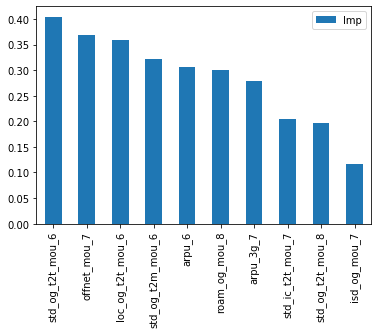

In [196]:
ax = df1.plot.bar()

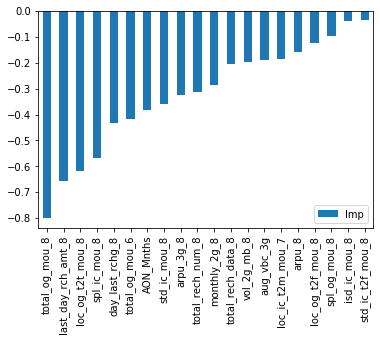

In [197]:
ax = df2.plot.bar()

# ********************************************************************************************
# Results

##### Logistic Regression with PCA

| Accuracy | Sensitivity | Specificity | False Positive Rate | Precision | Negative Predictive Value | Misclassification Rate |
|----------|-------------|-------------|---------------------|-----------|---------------------------|------------------------|
|    83%   |    84%      |    83%      |        17%          |    33%    |           98%             |       17%              |

##### Decision Tree with PCA - before tuning the hyperparamters

| Accuracy | Sensitivity | Specificity | False Positive Rate | Precision | Negative Predictive Value | Misclassification Rate |
|----------|-------------|-------------|---------------------|-----------|---------------------------|------------------------|
|    83%   |    73%      |    83%      |        17%          |    30%    |           97%             |       18%              |

##### Decision Tree with PCA - after tuning the hyperparamters

| Accuracy | Sensitivity | Specificity | False Positive Rate | Precision | Negative Predictive Value | Misclassification Rate |
|----------|-------------|-------------|---------------------|-----------|---------------------------|------------------------|
|    84%   |    66%      |    86%      |        14%          |    32%    |           96%             |       16%              |

#####  Random Forest with PCA

| Accuracy | Sensitivity | Specificity | False Positive Rate | Precision | Negative Predictive Value | Misclassification Rate |
|----------|-------------|-------------|---------------------|-----------|---------------------------|------------------------|
|    86%   |    75%      |    88%      |        12%          |    38%    |           97%             |       14%              |


##### Conclusion
The logistic regression model with PCA seem to be a better choice as it has got better sensitivity. So, this model would predict more number of customers who are likely to churn.



# Best features:
Positive relation to Churn (Top 5 features):
-----------------------------------------------------------
std_og_t2t_mou_6      
offnet_mou_7          
loc_og_t2t_mou_6       
std_og_t2m_mou_6       
arpu_6



